In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random



sns.set_style("whitegrid")
plt.style.use('seaborn-whitegrid')
sns.set(rc={'figure.figsize':(18,6)})
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

random.seed = 0
np.random.seed = 0

In [2]:
import warnings
warnings.filterwarnings('ignore')

Reading Data

In [3]:
methods = ['mofa','gfa','icluster','emfr','all']
dict_df_method = {}
for i in methods:
    df = pd.read_csv("Data\\Input\\Reduced_features\\Top_feature_" +i+ ".csv",usecols=lambda x: "Unnamed" not in x)
    df['label'] = df['label'] == 1
    name_map = {i: "Cytokine_" + i for i in  df.columns if (i != 'SampleID') & (i != 'label') & ("_" not in i)}
    df.rename(name_map,inplace=True,axis=1)
    df.columns = ["microbiome_"+i if ("gut" in i) | ('nares' in i) else i for i in df.columns  ]
    print(i)
    print(df.columns)
    dict_df_method[i] = {'full' : df}
    print('')
DF_split = pd.read_csv('Data\Input\split\ID_split.csv')

mofa
Index(['SampleID', 'Deseq_AHNAK', 'Deseq_HLA-E', 'Deseq_RPL3', 'Deseq_UBC',
       'Deseq_RPS20', 'Deseq_IQGAP1', 'Deseq_LCP1', 'Deseq_RPS24',
       'Deseq_RPL23', 'Deseq_EEF2', 'Deseq_SNORD17', 'Deseq_ANXA6',
       'Deseq_RMRP', 'Deseq_RPL6', 'Deseq_PSAP', 'Deseq_TMSB10',
       'Deseq_EEF1A1', 'Deseq_RPL32', 'Deseq_ANXA1', 'Deseq_LYZ',
       'proteome_HV313', 'proteome_APOE', 'proteome_CAPZB', 'proteome_CLU',
       'proteome_IGHG4', 'proteome_A2M', 'proteome_CFHR2', 'proteome_IL1RAP',
       'proteome_IGHA2', 'proteome_HPR', 'proteome_PROZ', 'proteome_HP',
       'proteome_PLTP', 'proteome_LV743', 'proteome_C6', 'proteome_CD14',
       'proteome_CAMP', 'proteome_SAA1', 'proteome_KV320.1', 'proteome_FCN2',
       'metabolome_nRPLC_463.3428_11', 'metabolome_nRPLC_437.3271_10.7',
       'metabolome_nRPLC_393.3013_10.7', 'metabolome_nRPLC_461.3269_10.7',
       'metabolome_nRPLC_445.3323_11', 'metabolome_nRPLC_507.3686_10.6',
       'metabolome_nRPLC_389.2702_10.4', 'metabolome_

all
Index(['SampleID', 'Deseq_A1BG-AS1', 'Deseq_ABHD1', 'Deseq_ABLIM1',
       'Deseq_ACADVL', 'Deseq_ACAT2', 'Deseq_ACOT8', 'Deseq_ACPT',
       'Deseq_ACSM3', 'Deseq_ACTB',
       ...
       'Cytokine_VEGF', 'Cytokine_LEPTIN', 'Cytokine_PAI1', 'Cytokine_CD40L',
       'Cytokine_ENA78', 'Cytokine_CHEX1', 'Cytokine_CHEX2', 'Cytokine_CHEX3',
       'Cytokine_CHEX4', 'label'],
      dtype='object', length=1061)



Describing data

In [4]:
for k, df in dict_df_method.items():
    print(k)
    df['full'].info(max_cols=5)
    print("")
    print(pd.Series([i.split('_')[0] for i in df['full'].drop(['SampleID','label'],axis=1).columns]).value_counts())

mofa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 93 entries, SampleID to label
dtypes: bool(1), float64(91), object(1)
memory usage: 127.5+ KB

metabolome    20
Deseq         20
proteome      20
microbiome    18
Cytokine      13
dtype: int64
gfa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 93 entries, SampleID to label
dtypes: bool(1), float64(91), object(1)
memory usage: 127.5+ KB

metabolome    20
Deseq         20
proteome      20
microbiome    18
Cytokine      13
dtype: int64
icluster
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 93 entries, SampleID to label
dtypes: bool(1), float64(91), object(1)
memory usage: 127.5+ KB

metabolome    20
Deseq         20
proteome      20
microbiome    18
Cytokine      13
dtype: int64
emfr
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 93 entries, SampleID to label
dtypes: bool(1), float64(91), object(1)
memo

Train, test split and shuffeling train

In [5]:
for k, df in dict_df_method.items():
    df['train'] = df['full'][df['full']['SampleID'].isin(DF_split.loc[DF_split['split'] == 'train','SampleID'])].sample(frac=1,random_state=1)
    df['test'] = df['full'][df['full']['SampleID'].isin(DF_split.loc[DF_split['split'] == 'test','SampleID'])]

In [6]:
for k, df in dict_df_method.items():
    print(k)
    print(df['train'].shape)
    print('')

mofa
(111, 93)

gfa
(111, 93)

icluster
(111, 93)

emfr
(111, 93)

all
(111, 1061)



In [7]:
for k, df in dict_df_method.items():
    print(k)
    print(df['test'].shape)
    print('')

mofa
(66, 93)

gfa
(66, 93)

icluster
(66, 93)

emfr
(66, 93)

all
(66, 1061)



In [8]:
dict_df_method['mofa']['full']['label'].value_counts()

False    153
True      24
Name: label, dtype: int64

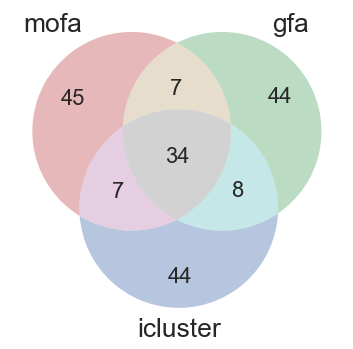

In [9]:
set1 = set(dict_df_method['mofa']['full'].columns)
set2 = set(dict_df_method['gfa']['full'].columns)
set3 = set(dict_df_method['icluster']['full'].columns)

venn3([set1, set2,set3], ('mofa', 'gfa','icluster'))
plt.show()

In [10]:
inter_arr = np.ones((4,4))
for i, df_dict in enumerate([v for k,v in dict_df_method.items() if k != 'all']):
    a = df_dict['full'].columns
    for c, df_dict in enumerate([v for k,v in dict_df_method.items() if k != 'all']):
        b = df_dict['full'].columns
        inter_arr[i,c] = a.isin(b).sum()

In [11]:
inter_arr

array([[93., 41., 41., 42.],
       [41., 93., 42., 45.],
       [41., 42., 93., 42.],
       [42., 45., 42., 93.]])

<AxesSubplot:>

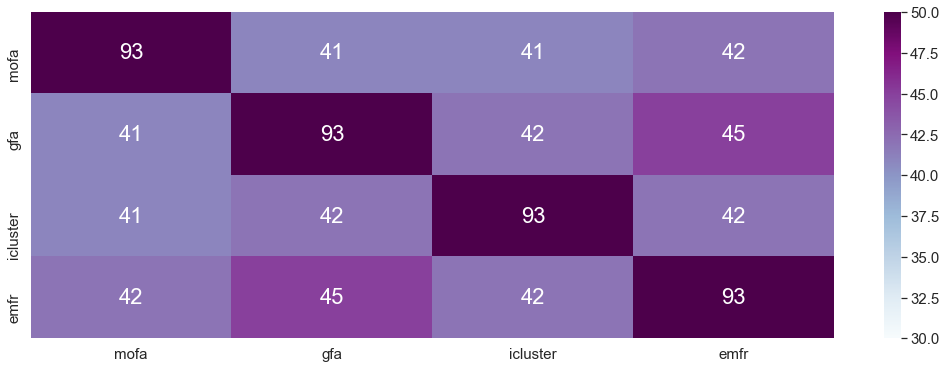

In [12]:
sns.heatmap(pd.DataFrame(inter_arr,index=methods[:4], columns=methods[:4]),annot=True,vmin=30, vmax=50,cmap="BuPu")

Feature Selelction Libraries

In [13]:
from ML_utils import ML_Pipeline, random_feature_selector, Recursive_feature_selector_evaluation, PR_AUC
from ML_selector_utils import ML_Selector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score, matthews_corrcoef, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

mofa
Model val_mean_score val_std_score
('SVC', 0.10357142857142858, 0.16937008144827678)
test_score
recall 0.14285714285714285
precision 0.034482758620689655
f1_score 0.05555555555555555
Avg_Percision_score 0.6969651401230348
PR_AUC_score 0.6892322483111957
ROC_AUC_score 0.8297872340425532

('RF', 0.7333333333333334, 0.2905932629027116)
test_score
recall 0.8571428571428571
precision 1.0
f1_score 0.923076923076923
Avg_Percision_score 0.9999999999999998
PR_AUC_score 0.9999999999999998
ROC_AUC_score 1.0



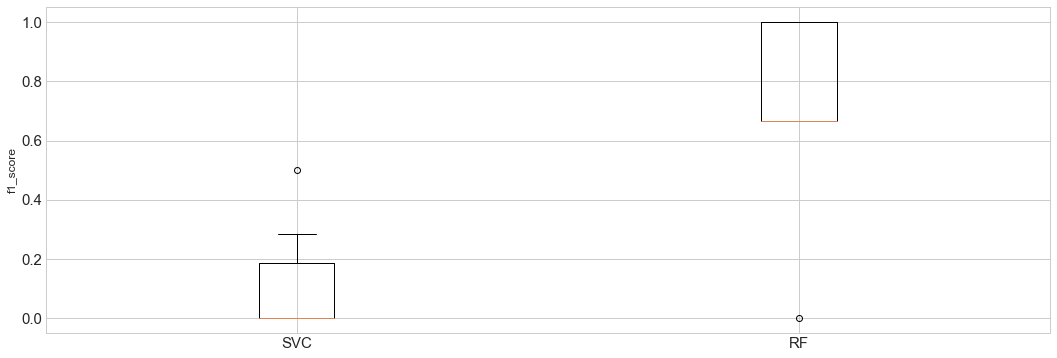


gfa
Model val_mean_score val_std_score
('SVC', 0.0, 0.0)
test_score
recall 0.14285714285714285
precision 0.03225806451612903
f1_score 0.052631578947368425
Avg_Percision_score 0.8536866359447005
PR_AUC_score 0.8492922975641869
ROC_AUC_score 0.9209726443768997

('RF', 0.8, 0.30550504633038933)
test_score
recall 0.7142857142857143
precision 1.0
f1_score 0.8333333333333333
Avg_Percision_score 0.9999999999999998
PR_AUC_score 0.9999999999999998
ROC_AUC_score 1.0



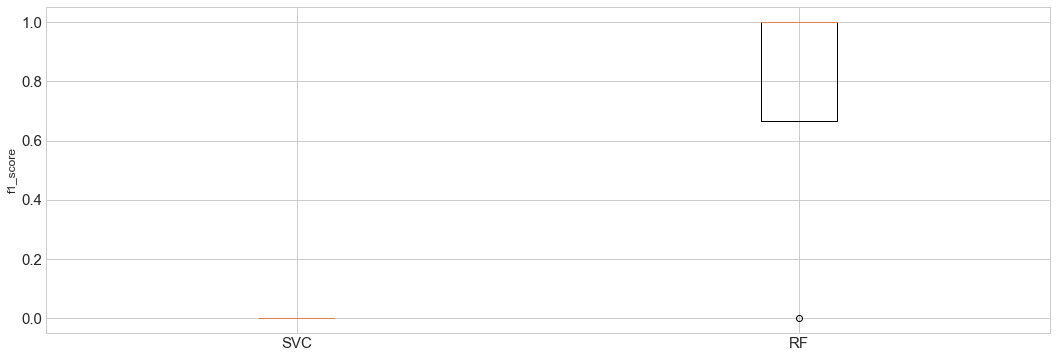


icluster
Model val_mean_score val_std_score
('SVC', 0.0, 0.0)
test_score
recall 0.14285714285714285
precision 0.03225806451612903
f1_score 0.052631578947368425
Avg_Percision_score 0.8035714285714286
PR_AUC_score 0.7985705151625868
ROC_AUC_score 0.9118541033434651

('RF', 0.36666666666666664, 0.37859388972001823)
test_score
recall 0.2857142857142857
precision 1.0
f1_score 0.4444444444444445
Avg_Percision_score 1.0
PR_AUC_score 1.0
ROC_AUC_score 1.0



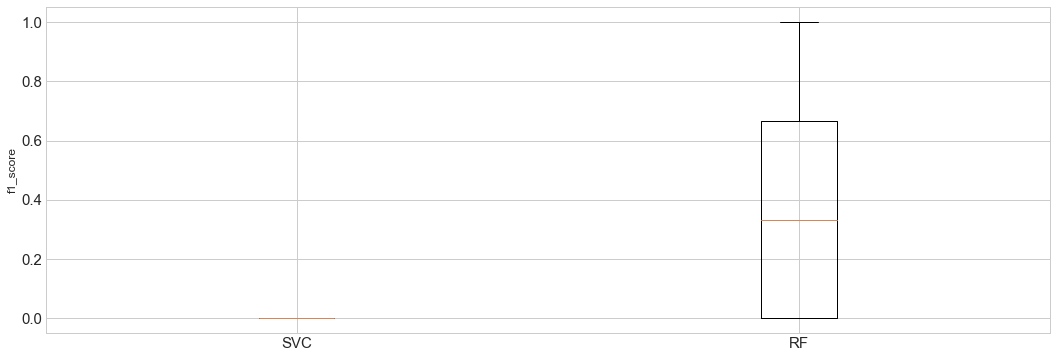


emfr
Model val_mean_score val_std_score
('SVC', 0.1, 0.21343747458109497)
test_score
recall 0.0
precision 0.0
f1_score 0.0
Avg_Percision_score 0.5552506861330391
PR_AUC_score 0.5062382098179312
ROC_AUC_score 0.8710359408033826

('RF', 0.8666666666666666, 0.30550504633038933)
test_score
recall 0.7272727272727273
precision 1.0
f1_score 0.8421052631578948
Avg_Percision_score 1.0
PR_AUC_score 1.0
ROC_AUC_score 1.0



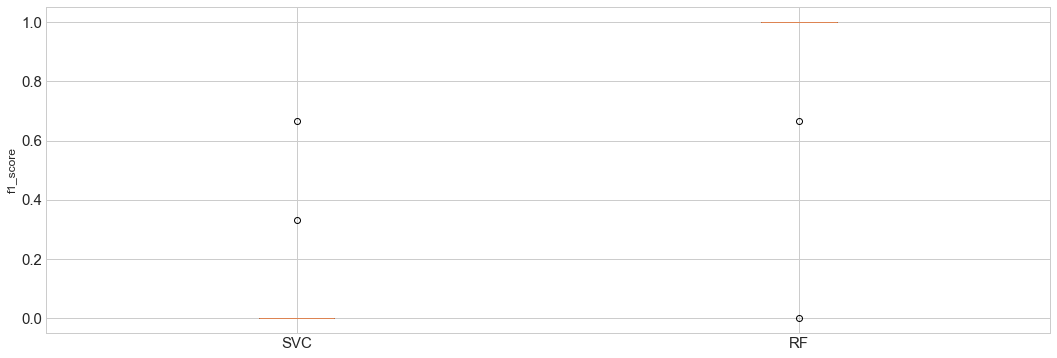


all
Model val_mean_score val_std_score
('SVC', 0.0, 0.0)
test_score
recall 0.0
precision 0.0
f1_score 0.0
Avg_Percision_score 0.9821428571428572
PR_AUC_score 0.9808673469387755
ROC_AUC_score 0.9969604863221884

('RF', 0.8666666666666666, 0.16329931618554522)
test_score
recall 0.7142857142857143
precision 1.0
f1_score 0.8333333333333333
Avg_Percision_score 0.9999999999999998
PR_AUC_score 0.9999999999999998
ROC_AUC_score 1.0



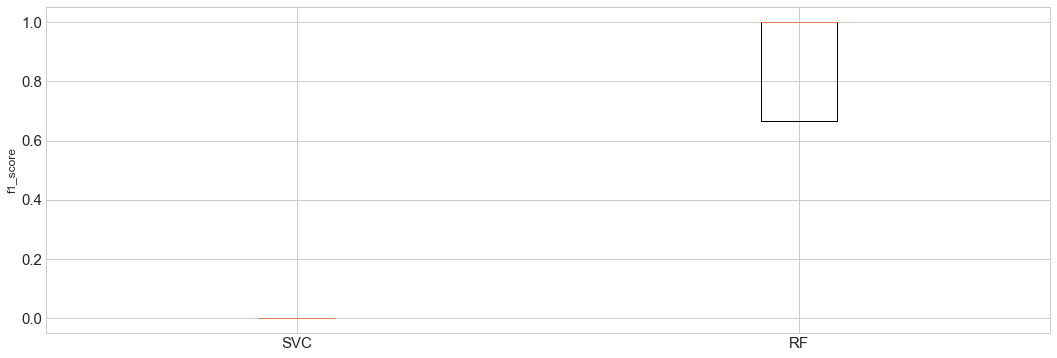

In [17]:
dict_model_method = {}
dict_result_method = {}
for k, dict_df in dict_df_method.items():
    X_train, X_test, y_train, y_test=train_test_split(dict_df['full'].drop(['SampleID','label'],axis=1), dict_df['full']['label'],random_state=3,test_size=0.3)
    print(k)
    sns.set_style("whitegrid")
    plt.style.use('seaborn-whitegrid')
    results, Models = ML_Pipeline(X_train,y_train,k,test=True,X_test= X_test,y_test = y_test,used_models=['RF','SVC'],cv_scoring='f1',num_folds = 10)
    dict_model_method[k] = Models
    results['method'] = k
    dict_result_method[k] = results
    print('')

In [15]:
df_cvresults_methods = pd.concat([results.loc[[i for i in results.index if 'split' in i],:] for k, results in dict_result_method.items()])

In [16]:
df_cvresults_methods_svc = pd.pivot(df_cvresults_methods,columns='method',values='SVC')
f_oneway(*[df_cvresults_methods_svc[c] for c in df_cvresults_methods_svc.columns])

F_onewayResult(statistic=1.8848716235563623, pvalue=0.12958824905898356)

In [17]:
pairwise_tukeyhsd(df_cvresults_methods['SVC'].astype('float'),df_cvresults_methods['method']).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [18]:
df_cvresults_methods_rf = pd.pivot(df_cvresults_methods,columns='method',values='RF')
f_oneway(*[df_cvresults_methods_rf[c] for c in df_cvresults_methods_rf.columns])

F_onewayResult(statistic=5.2303102625298346, pvalue=0.0015131281377500233)

In [19]:
pairwise_tukeyhsd(df_cvresults_methods['RF'].astype('float'),df_cvresults_methods['method']).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

- CV with Kfold of 10 was used to make sure that results are most reproducable (best among bootstrapping and montecarlo)
## Conclusion
- baseline for no selection is RF: 0.98, SVC:0.78
- emfr model is showing the highest score in both RF:0.99 and SVC:0.84 (indicating best sepration with max linearity)
- other models are splitted as following
    - generally well performin gfa RF: 0.97, SVC 0.78
    - well performing with lower linear sep mofa RF: 0.96 SVC: 0.74
    - lower performing icluster RF: 0.95, SVC: 0.76

In [20]:
list_df_imp = []
for k, Models in dict_model_method.items():
    DF_imp = pd.DataFrame({
        "method" : k,
        "omic_type": [i.split('_')[0] for i in dict_df_method[k]['train'].drop(['SampleID','label'],axis=1).columns],
        "col":
        dict_df_method[k]['train'].drop(['SampleID','label'],axis=1).columns,
        "RFfi":
        np.abs(Models['RF'].feature_importances_.flatten())
    })
    list_df_imp.append(DF_imp)

In [21]:
DF_imp_RF = pd.concat(list_df_imp)

In [22]:
DF_imp_RF.head()

method omic_type          col      RFfi
0   mofa     Deseq  Deseq_AHNAK  0.005043
1   mofa     Deseq  Deseq_HLA-E  0.000000
2   mofa     Deseq   Deseq_RPL3  0.002955
3   mofa     Deseq    Deseq_UBC  0.002228
4   mofa     Deseq  Deseq_RPS20  0.015382

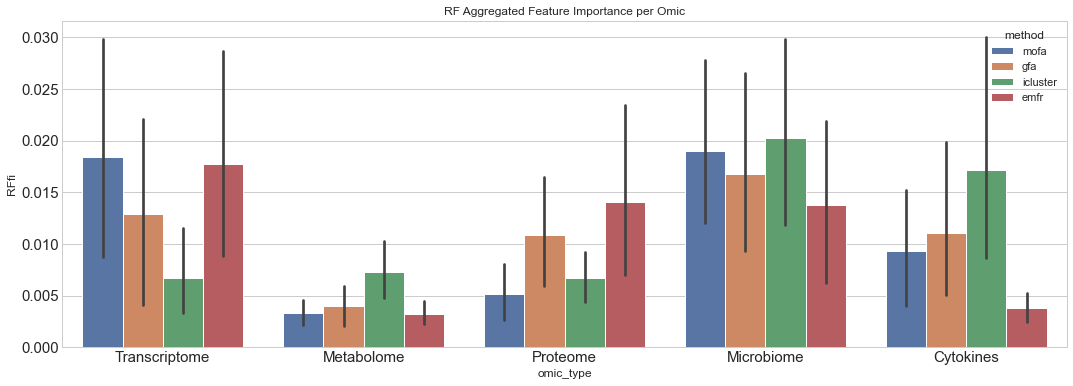

In [23]:
ax = sns.barplot(data = DF_imp_RF[DF_imp_RF['method'] != 'all'], x='omic_type',y='RFfi',hue='method' )
ax.set_xticklabels(['Transcriptome','Metabolome','Proteome','Microbiome','Cytokines'])
plt.title("RF Aggregated Feature Importance per Omic")
plt.show()

In [24]:
list_df_imp = []
for k, Models in dict_model_method.items():
    DF_imp = pd.DataFrame({
        "method" : k,
        "omic_type": [i.split('_')[0] for i in dict_df_method[k]['train'].drop(['SampleID','label'],axis=1).columns],
        "col":
        dict_df_method[k]['train'].drop(['SampleID','label'],axis=1).columns,
        "SVC_Wts":
        np.abs(Models['SVC'].coef_.flatten())
    })
    list_df_imp.append(DF_imp)

In [25]:
DF_imp_SVC = pd.concat(list_df_imp)

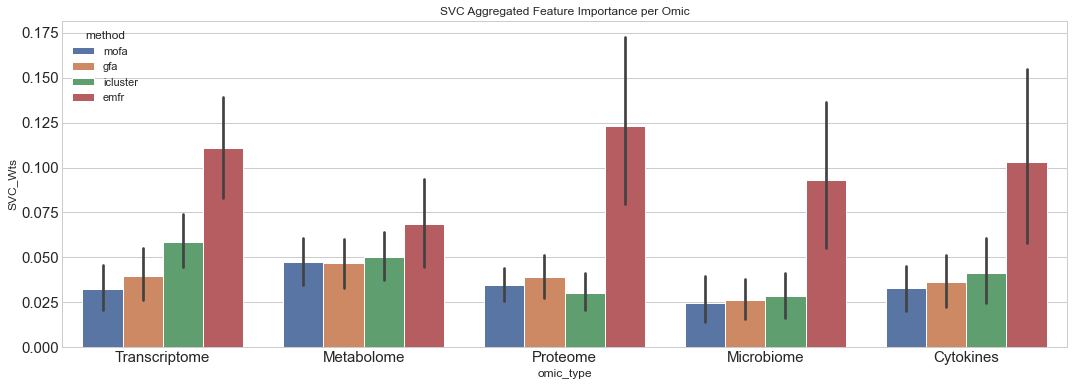

In [26]:
ax = sns.barplot(data = DF_imp_SVC[DF_imp_SVC['method'] != 'all'], x='omic_type',y='SVC_Wts',hue='method' )
ax.set_xticklabels(['Transcriptome','Metabolome','Proteome','Microbiome','Cytokines'])
plt.title("SVC Aggregated Feature Importance per Omic")
plt.show()

In [27]:
DF_imp_SVC.head()

method omic_type          col   SVC_Wts
0   mofa     Deseq  Deseq_AHNAK  0.066445
1   mofa     Deseq  Deseq_HLA-E  0.052794
2   mofa     Deseq   Deseq_RPL3  0.018768
3   mofa     Deseq    Deseq_UBC  0.005551
4   mofa     Deseq  Deseq_RPS20  0.067754

## Conclusion:
- Overall
    - Microbiome are showing the  highest impact for our target and proteomes are showing lower impact
- Model
    - icluster tends to focus on certain subsets and ignoring the other (bad indicator)
    - gfa is showing the highest homogenesity for feature importance (good indicator)
    - 
## TODO:
- Variance testing can be made to test significance

# Elimination Analysis

In [20]:
def reduce_k_ranked_fet(ranked_cols,fet_cat,k, reduce_best=True):
    fet_ls = []
    for fet in fet_cat:
        fet_full_ls = [col for col in ranked_cols if (fet in col)]
        if not reduce_best:
            fet_full_ls = list(reversed(fet_full_ls))
        fet_ls += [col for i,col in enumerate(fet_full_ls) if (i < k)]
    return fet_ls

98
0
Model val_mean_score val_std_score
('SVC', 0.7465391743962377, 0.12732896108104128)


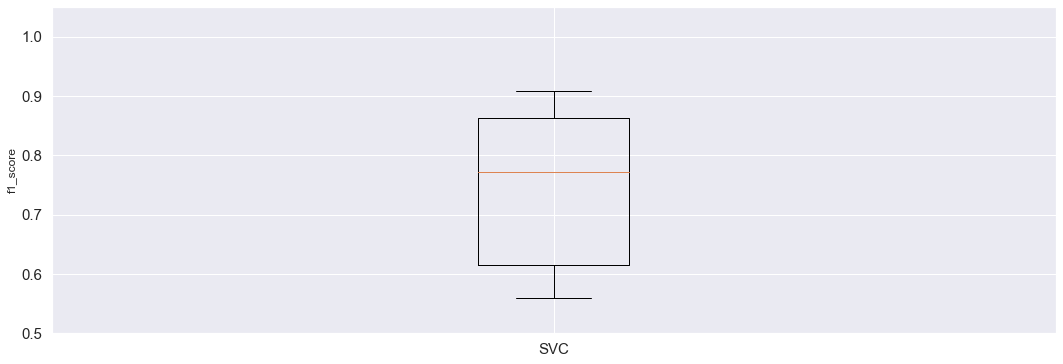


85
3
Model val_mean_score val_std_score
('SVC', 0.6662852147852146, 0.1560802381076918)


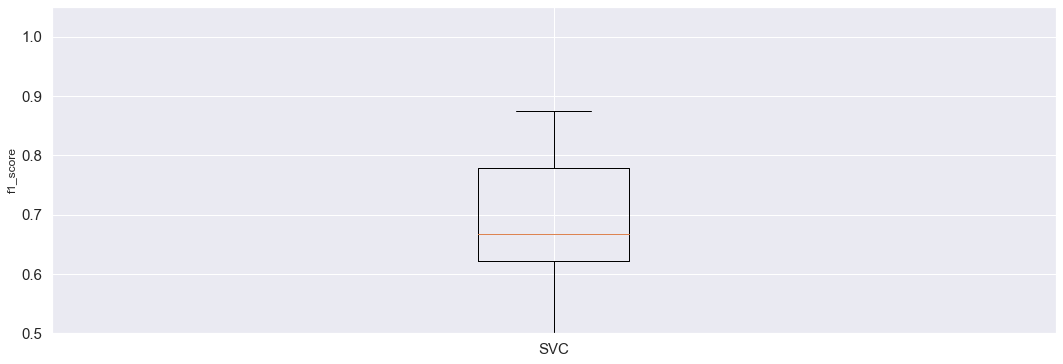


70
6
Model val_mean_score val_std_score
('SVC', 0.704893533060095, 0.15965844447955232)


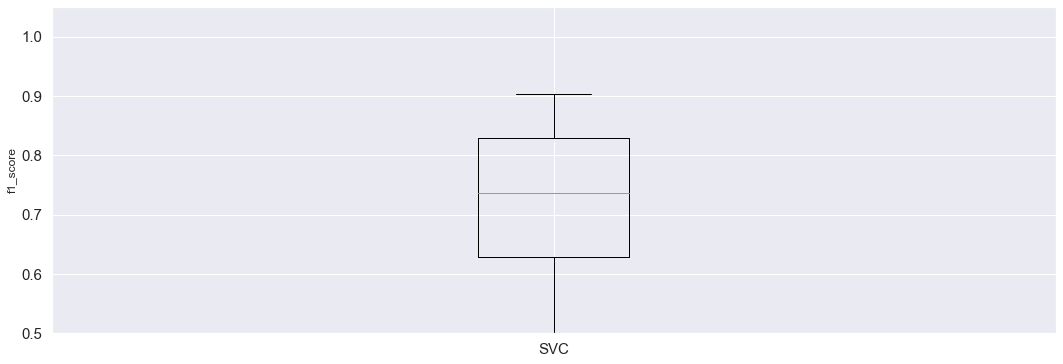


55
9
Model val_mean_score val_std_score
('SVC', 0.7752999602054107, 0.081798064880215)


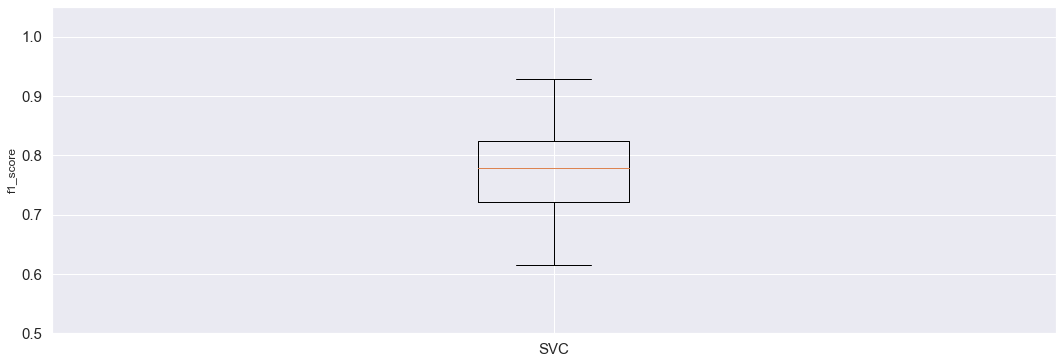


40
12
Model val_mean_score val_std_score
('SVC', 0.7296612760617209, 0.09230255613978579)


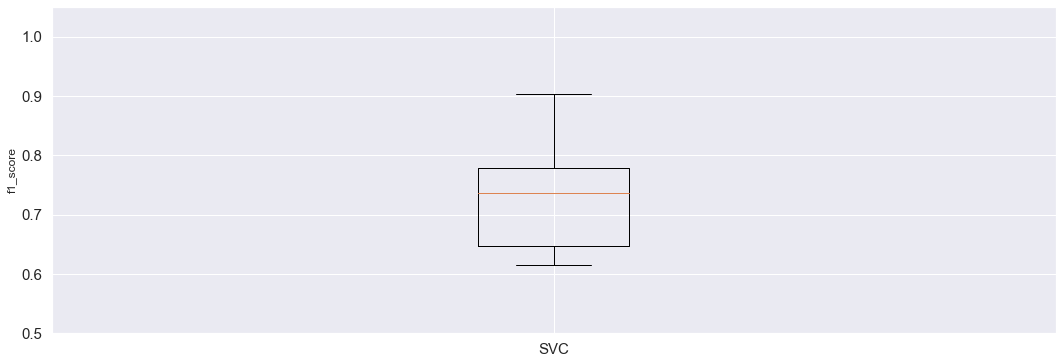


25
15
Model val_mean_score val_std_score
('SVC', 0.8010812852022529, 0.11241559588067633)


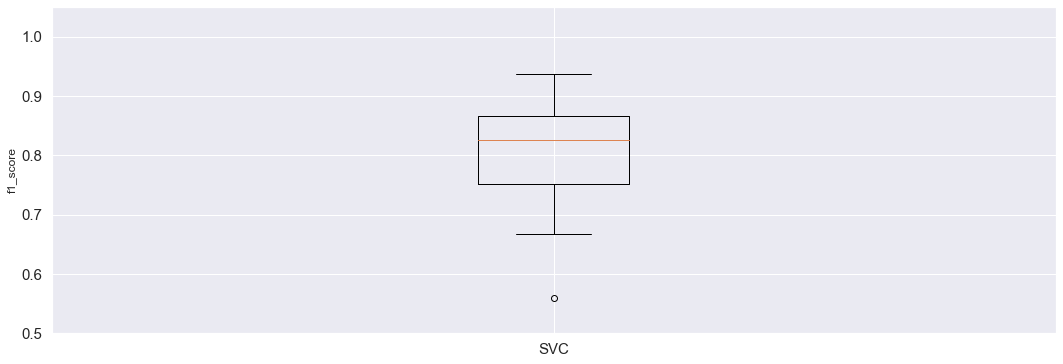


10
18
Model val_mean_score val_std_score
('SVC', 0.7718361212141599, 0.13972607294372352)


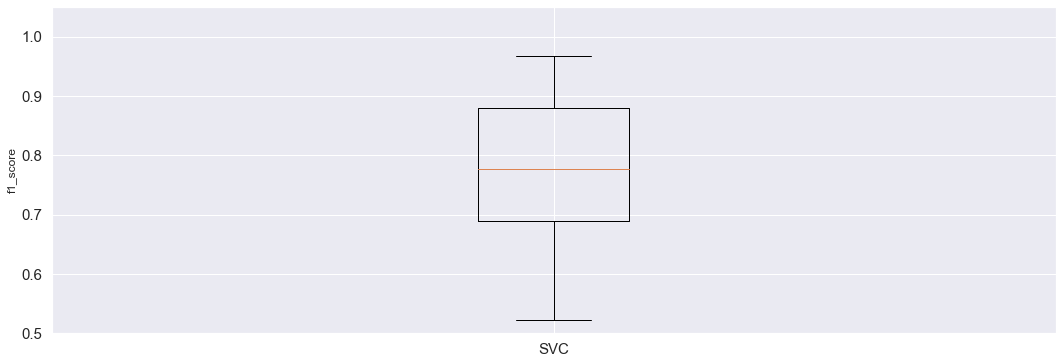

In [21]:
fet_cat = pd.Series([i.split('_')[0] for i in dict_df_method['mofa']['full'].drop(['SampleID','label'],axis=1).columns]).unique()
dict_model_results_mofa = {}
for sp_sz in range(0,20,3):
    DF = dict_df_method['mofa']['full']
    fet_ls = reduce_k_ranked_fet(DF.columns,fet_cat,20-sp_sz,reduce_best=False)
    print(len(fet_ls))
    X_train = DF.drop(['SampleID','label'],axis=1).loc[:,fet_ls]
    y_train = DF['label']
    
    print(sp_sz)
    results, Models = ML_Pipeline(X_train,y_train,str(sp_sz),test=False,used_models=['SVC'],cv_scoring='f1',num_folds = 10)
    results['reduced_fetures_per_omic'] = sp_sz
    dict_model_results_mofa[len(fet_ls)] = results
    print('')

<function matplotlib.pyplot.show(close=None, block=None)>

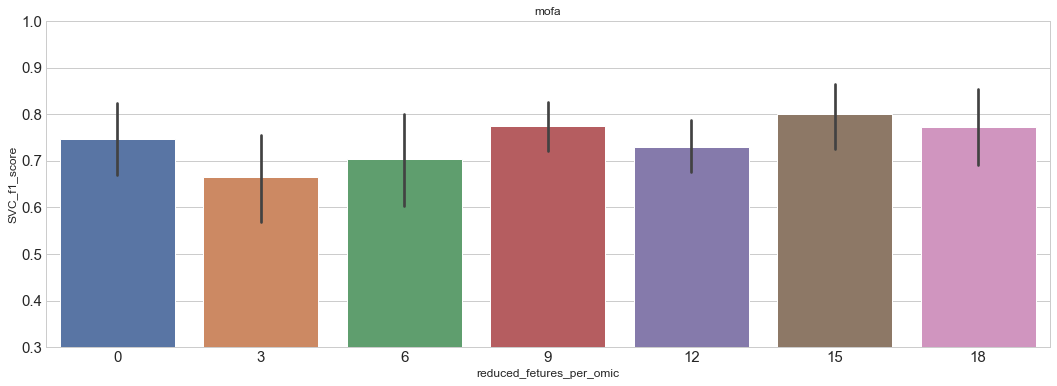

In [24]:
DF_method_split = pd.concat([results.loc[[i for i in results.index if 'split' in i],:] for k, results in dict_model_results_mofa.items()])
sns.set_style("whitegrid")
plt.style.use('seaborn-whitegrid')
sns.barplot(data=DF_method_split.astype({'SVC': 'float','reduced_fetures_per_omic' : 'int'}),x='reduced_fetures_per_omic',y='SVC')
plt.ylabel('SVC_f1_score')
plt.ylim(0.3,1)
plt.title('mofa')
plt.show

98
0
Model val_mean_score val_std_score
('SVC', 0.6388820119854601, 0.09054496237463133)


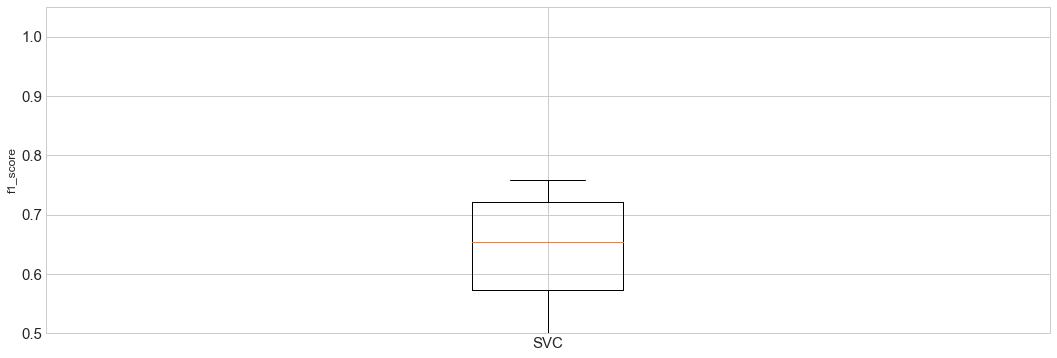


85
3
Model val_mean_score val_std_score
('SVC', 0.6927116730342535, 0.1285328424093456)


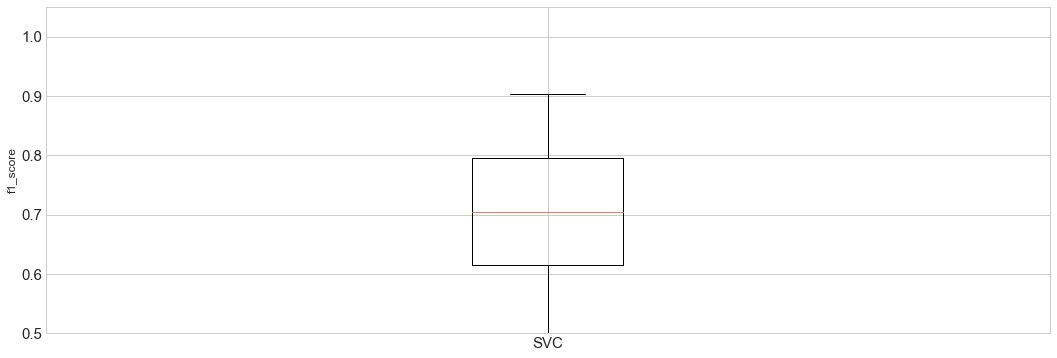


70
6
Model val_mean_score val_std_score
('SVC', 0.7554351395730705, 0.07128147471989102)


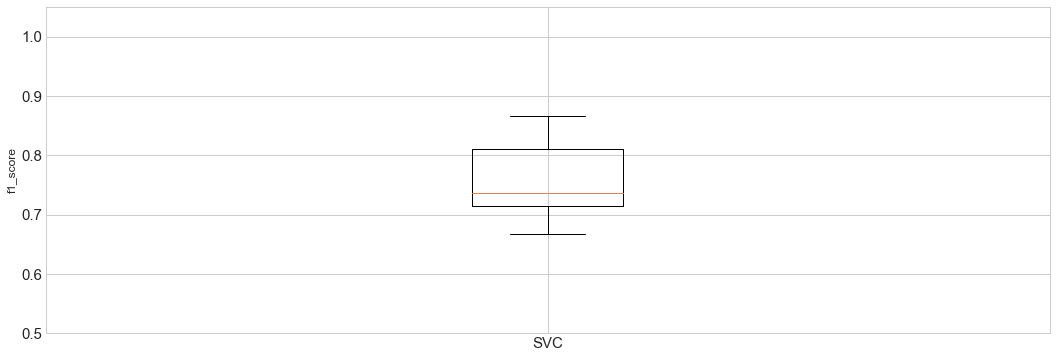


55
9
Model val_mean_score val_std_score
('SVC', 0.7426161063388901, 0.1257870088270394)


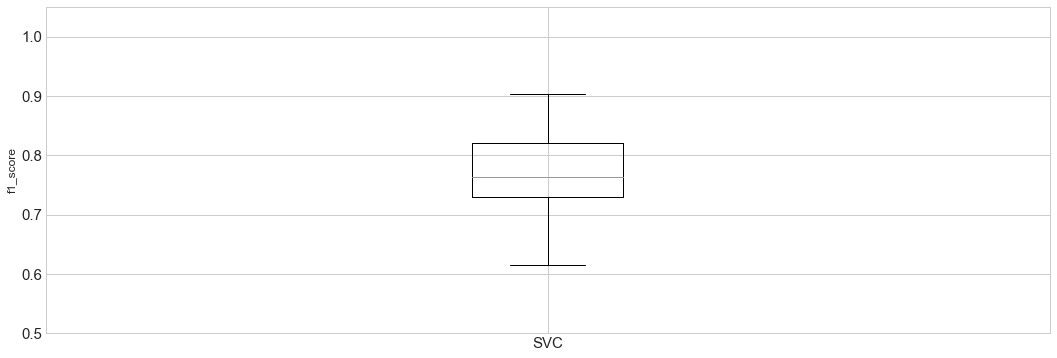


40
12
Model val_mean_score val_std_score
('SVC', 0.7611739354453481, 0.17344141182259146)


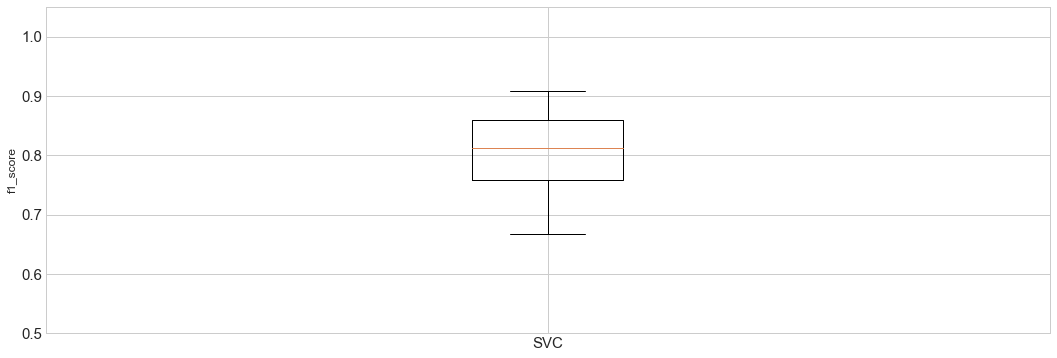


25
15
Model val_mean_score val_std_score
('SVC', 0.8053773048308038, 0.10117236638515015)


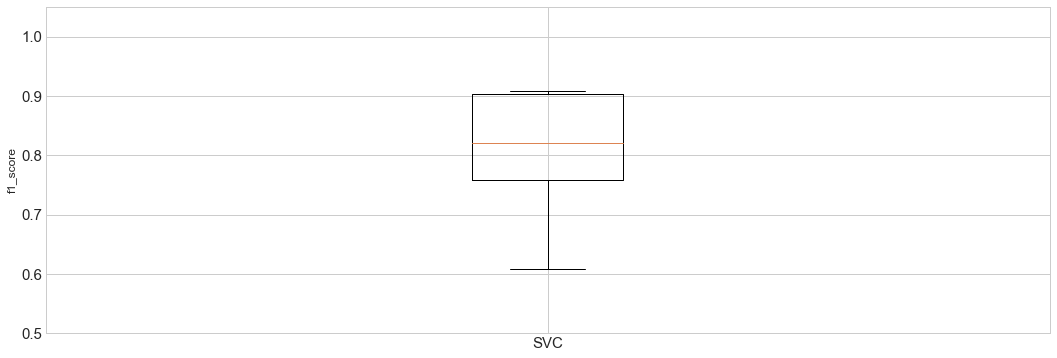


10
18
Model val_mean_score val_std_score
('SVC', 0.8035904372263613, 0.11685289961404406)


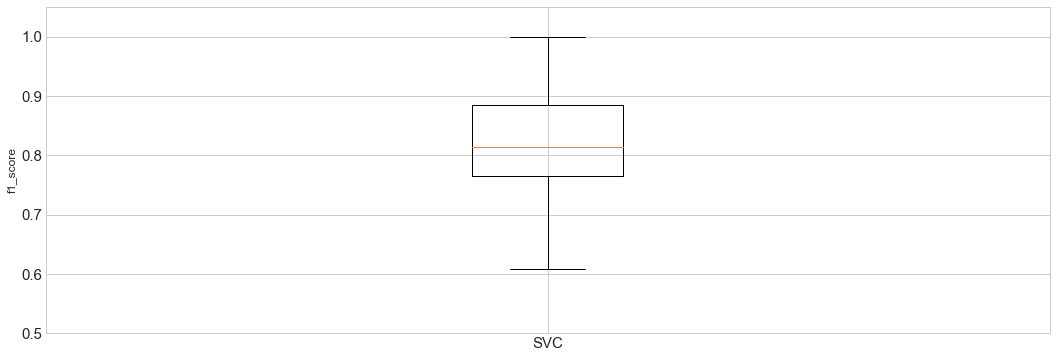

In [26]:
fet_cat = pd.Series([i.split('_')[0] for i in dict_df_method['mofa']['full'].drop(['SampleID','label'],axis=1).columns]).unique()
dict_model_results_gfa = {}
for sp_sz in range(0,20,3):
    DF = dict_df_method['gfa']['full']
    fet_ls = reduce_k_ranked_fet(DF.columns,fet_cat,20-sp_sz,reduce_best=False)
    print(len(fet_ls))
    X_train = DF.drop(['SampleID','label'],axis=1).loc[:,fet_ls]
    y_train = DF['label']
    
    print(sp_sz)
    results, Models = ML_Pipeline(X_train,y_train,str(sp_sz),test=False,used_models=['SVC'],cv_scoring='f1',num_folds = 10)
    results['reduced_fetures_per_omic'] = sp_sz
    dict_model_results_gfa[len(fet_ls)] = results
    print('')

<function matplotlib.pyplot.show(close=None, block=None)>

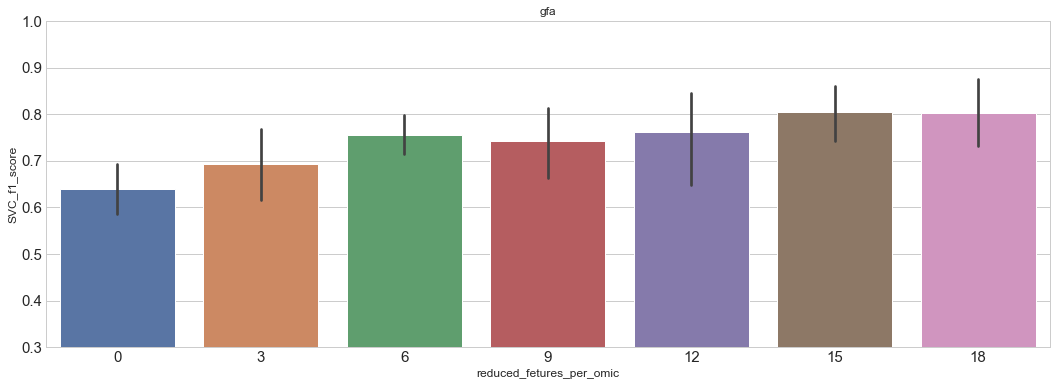

In [27]:
DF_method_split = pd.concat([results.loc[[i for i in results.index if 'split' in i],:] for k, results in dict_model_results_gfa.items()])

sns.barplot(data=DF_method_split.astype({'SVC': 'float','reduced_fetures_per_omic' : 'int'}),x='reduced_fetures_per_omic',y='SVC')

plt.ylabel('SVC_f1_score')
plt.ylim(0.3,1)
plt.title('gfa')
plt.show

98
0
Model val_mean_score val_std_score
('SVC', 0.5919516855929898, 0.23354114860344302)


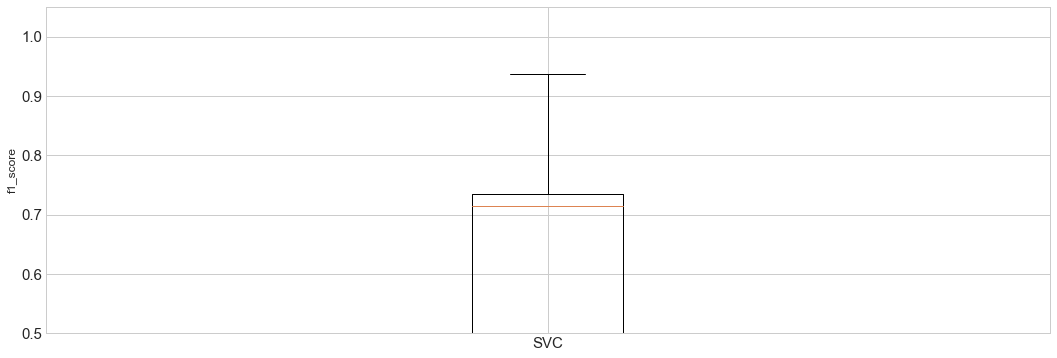


85
3
Model val_mean_score val_std_score
('SVC', 0.6780930871292143, 0.16197838397436015)


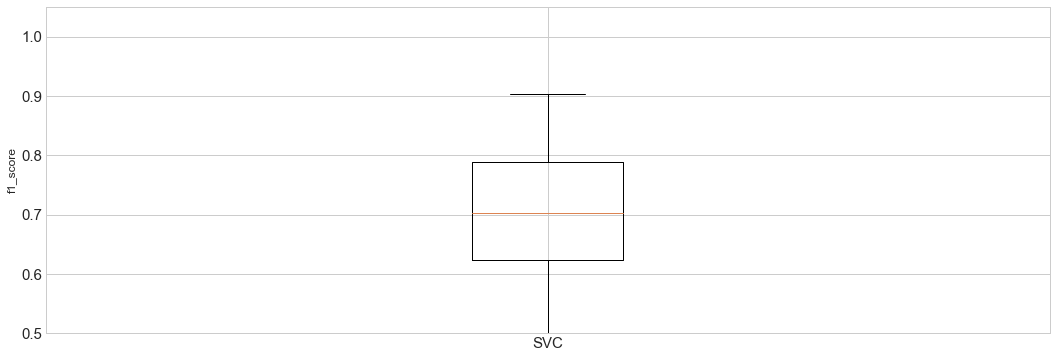


70
6
Model val_mean_score val_std_score
('SVC', 0.6894161958730924, 0.18634077812821384)


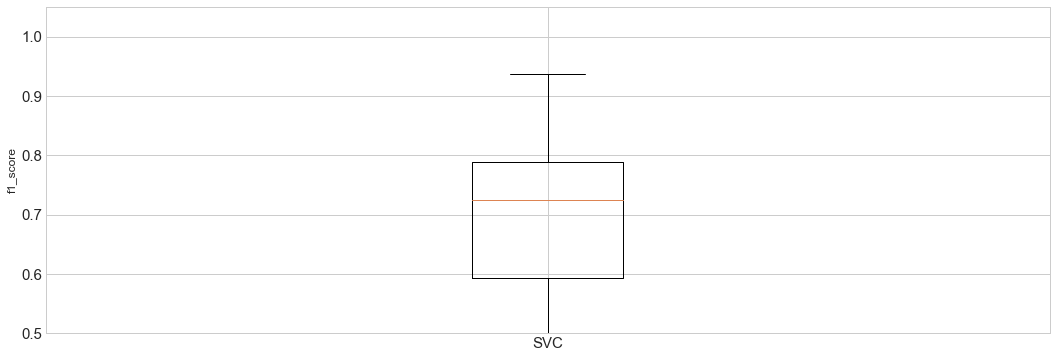


55
9
Model val_mean_score val_std_score
('SVC', 0.6820933876782403, 0.15245907623302685)


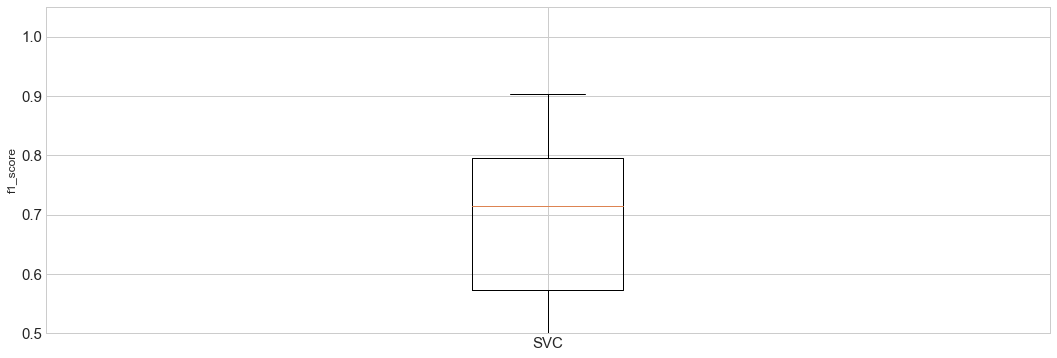


40
12
Model val_mean_score val_std_score
('SVC', 0.8283782365206168, 0.06122062712275033)


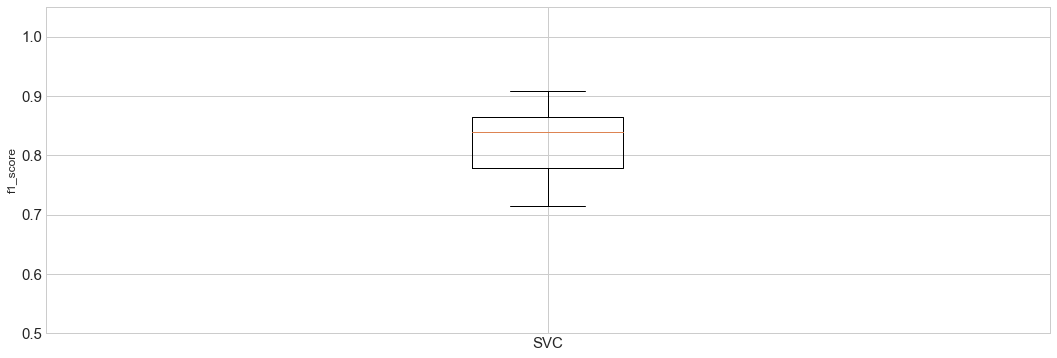


25
15
Model val_mean_score val_std_score
('SVC', 0.8365149450104956, 0.07260617261346786)


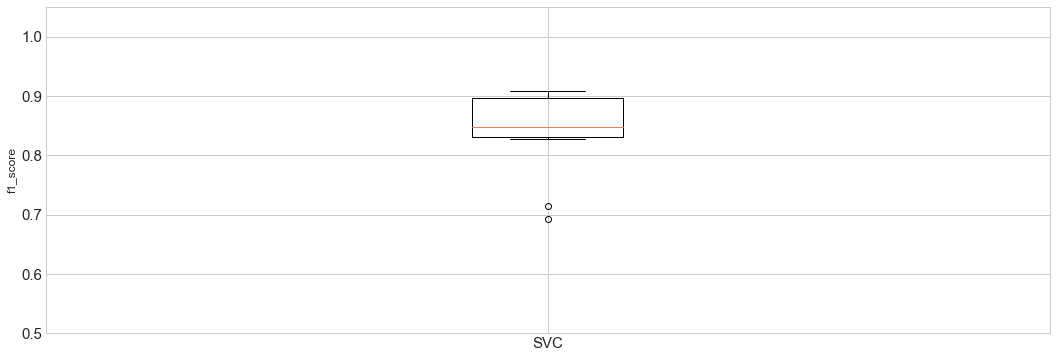


10
18
Model val_mean_score val_std_score
('SVC', 0.7249086555207246, 0.24799811444889425)


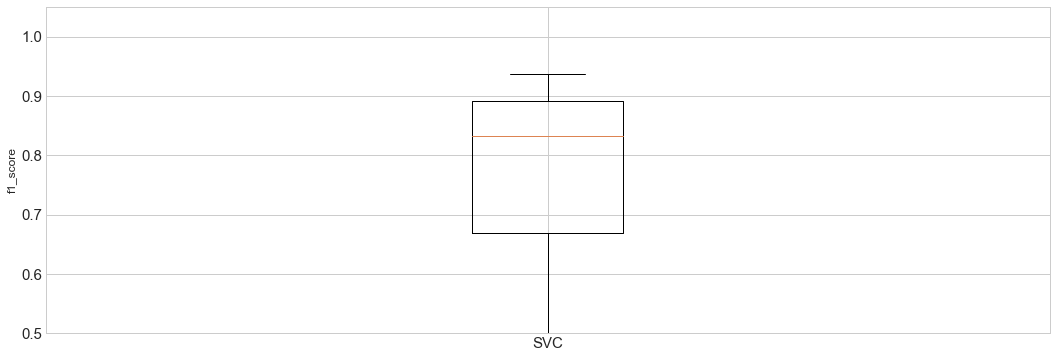

In [28]:
fet_cat = pd.Series([i.split('_')[0] for i in dict_df_method['mofa']['full'].drop(['SampleID','label'],axis=1).columns]).unique()
dict_model_results_icluster = {}
for sp_sz in range(0,20,3):
    DF = dict_df_method['icluster']['full']
    fet_ls = reduce_k_ranked_fet(DF.columns,fet_cat,20-sp_sz)
    print(len(fet_ls))
    X_train = DF.drop(['SampleID','label'],axis=1).loc[:,fet_ls]
    y_train = DF['label']
    
    print(sp_sz)
    results, Models = ML_Pipeline(X_train,y_train,str(sp_sz),test=False,used_models=['SVC'],cv_scoring='f1',num_folds = 10)
    results['reduced_fetures_per_omic'] = sp_sz
    dict_model_results_icluster[len(fet_ls)] = results
    print('')

<function matplotlib.pyplot.show(close=None, block=None)>

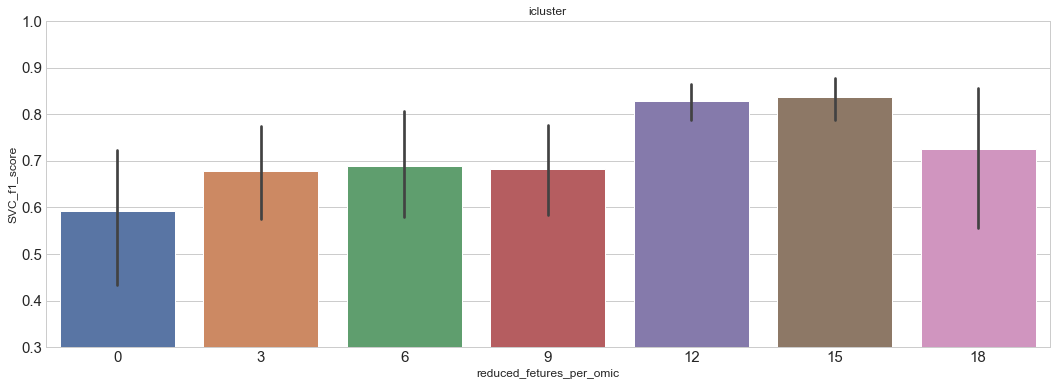

In [29]:
DF_method_split = pd.concat([results.loc[[i for i in results.index if 'split' in i],:] for k, results in dict_model_results_icluster.items()])

sns.barplot(data=DF_method_split.astype({'SVC': 'float'}),x='reduced_fetures_per_omic',y='SVC')

plt.ylabel('SVC_f1_score')
plt.ylim(0.3,1)
plt.title('icluster')
plt.show

98
0
Model val_mean_score val_std_score
('SVC', 0.8098893713813068, 0.08644452724764168)


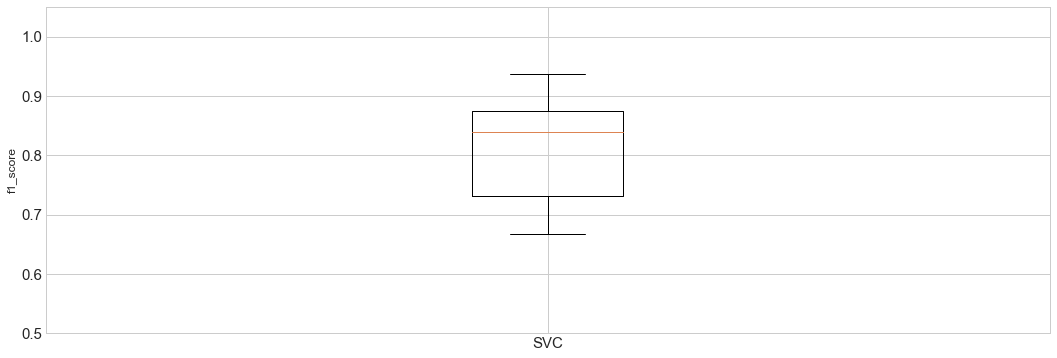


85
3
Model val_mean_score val_std_score
('SVC', 0.7830492894202571, 0.09800467342337328)


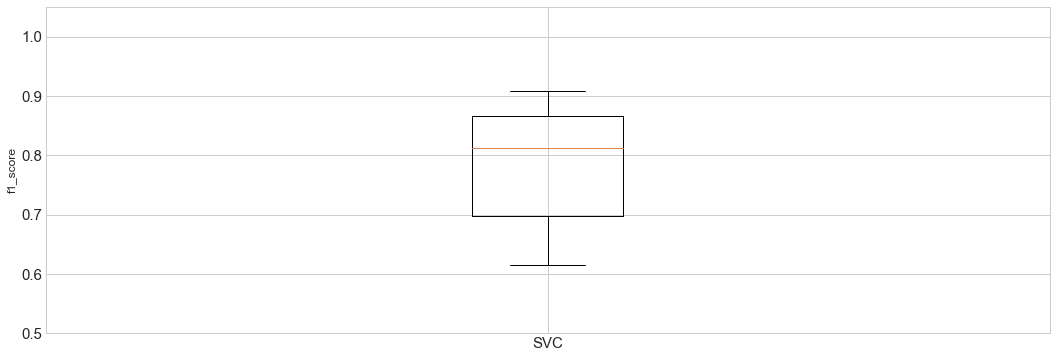


70
6
Model val_mean_score val_std_score
('SVC', 0.828962706946578, 0.039793219141465)


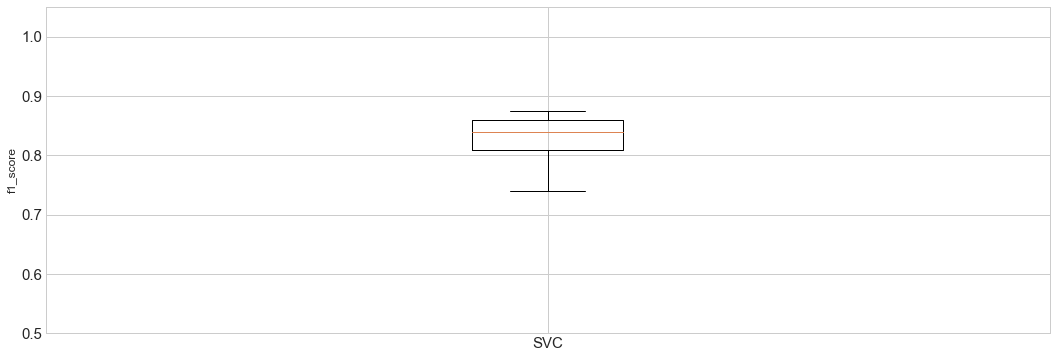


55
9
Model val_mean_score val_std_score
('SVC', 0.854434302256883, 0.05526332557127774)


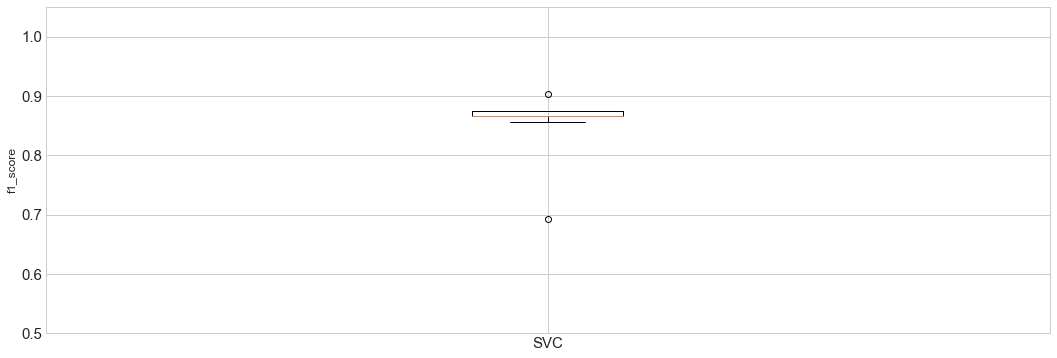


40
12
Model val_mean_score val_std_score
('SVC', 0.8313316966681816, 0.06974623799077316)


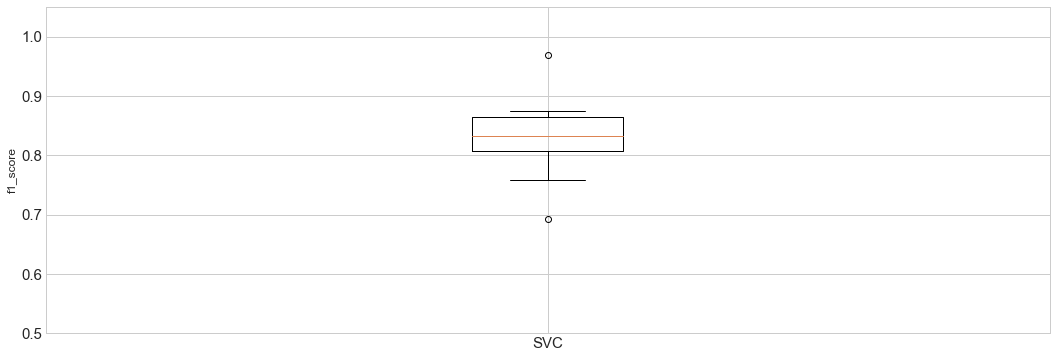


25
15
Model val_mean_score val_std_score
('SVC', 0.8441653250552028, 0.0646801786190712)


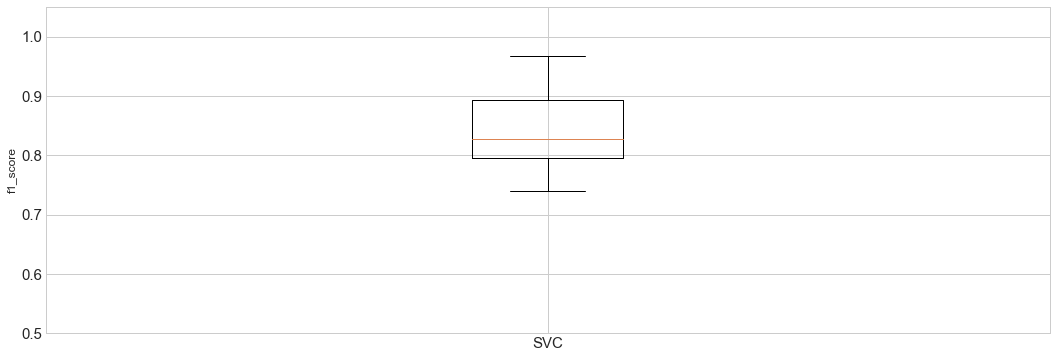


10
18
Model val_mean_score val_std_score
('SVC', 0.8325468225899261, 0.06748498871748258)


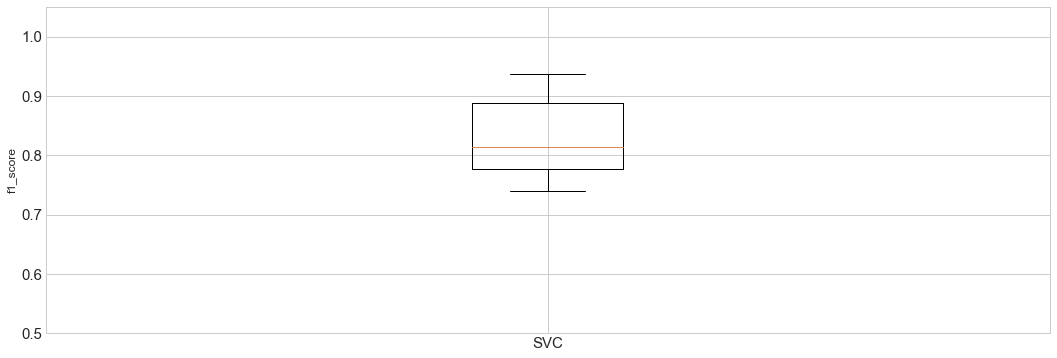

In [30]:
fet_cat = pd.Series([i.split('_')[0] for i in dict_df_method['mofa']['full'].drop(['SampleID','label'],axis=1).columns]).unique()
dict_model_results_emfr = {}
for sp_sz in range(0,20,3):
    DF = dict_df_method['emfr']['full']
    fet_ls = reduce_k_ranked_fet(DF.columns,fet_cat,20-sp_sz)
    print(len(fet_ls))
    X_train = DF.drop(['SampleID','label'],axis=1).loc[:,fet_ls]
    y_train = DF['label']
    
    print(sp_sz)
    results, Models = ML_Pipeline(X_train,y_train,str(sp_sz),test=False,used_models=['SVC'],cv_scoring='f1',num_folds = 10)
    results['reduced_fetures_per_omic'] = sp_sz
    dict_model_results_emfr[len(fet_ls)] = results
    print('')

<function matplotlib.pyplot.show(close=None, block=None)>

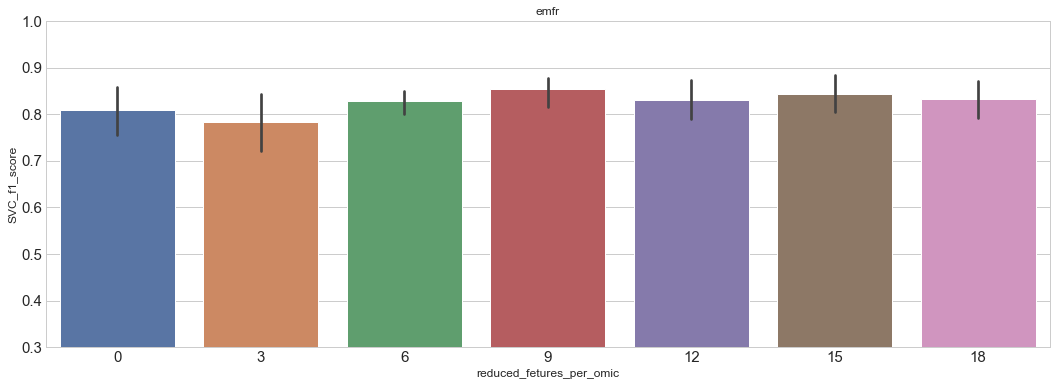

In [31]:
DF_method_split = pd.concat([results.loc[[i for i in results.index if 'split' in i],:] for k, results in dict_model_results_emfr.items()])

sns.barplot(data=DF_method_split.astype({'SVC': 'float'}),x='reduced_fetures_per_omic',y='SVC')

plt.ylabel('SVC_f1_score')
plt.ylim(0.3,1)
plt.title('emfr')
plt.show

since we are using linear model, good performiing (feature reduction) methods starts by increasing score (due to removl of less important feature which innecessarly increasing the feature space), then reaches a peak (optimum balance between no. of features and how imp they are) then the score degrades due to removing very imp features. <br>
early peak means higher performing feature elimination. emfr followed by gfa then icluster.
mofa is giving noisy increase and decreases which means either it is producing non linear features at which linear rank will not be good or the rank is not very efficent.

In [47]:
dict_df_method['gfa']['full'].loc[:, ['SampleID'] + reduce_k_ranked_fet(
    dict_df_method['gfa']['full'].columns, fet_cat, 20 -
    12, reduce_best=False) + ['label']].to_csv(
        "Data\\output\\RFESelected_top_feature_gfa.csv",index=False)

NameError: name 'reduce_k_ranked_fet' is not defined

In [28]:
X = dict_df['full'].drop(['SampleID','label'],axis=1)
y = dict_df['full']['label']

def balanced_subsample(y, size=None):

    subsample = []

    if size is None:
        n_smp = y.value_counts().min()
    else:
        n_smp = int(size / len(y.value_counts().index))

    for label in y.value_counts().index:
        samples = y[y == label].index.values
        index_range = range(samples.shape[0])
        indexes = np.random.choice(index_range, size=n_smp, replace=False)
        subsample += samples[indexes].tolist()

    return subsample

In [29]:
ds_ind = balanced_subsample(y)
X_ds = X.loc[ds_ind,:]
y_ds = y.loc[ds_ind]

# Per Omic Model

mofa Report
Model val_mean_score val_std_score
('RF', 0.5666666666666667, 0.39581140290126393)
f1_score  Cytokine   0.8333333333333333
Model val_mean_score val_std_score
('RF', 0.16666666666666666, 0.3415650255319866)
f1_score  metabolome   0.22222222222222224
Model val_mean_score val_std_score
('RF', 0.6666666666666667, 0.3651483716701107)
f1_score  Deseq   0.7272727272727273
Model val_mean_score val_std_score
('RF', 0.0, 0.0)
f1_score  proteome   0.0
Model val_mean_score val_std_score
('RF', 0.8666666666666666, 0.30550504633038933)
f1_score  microbiome   0.923076923076923


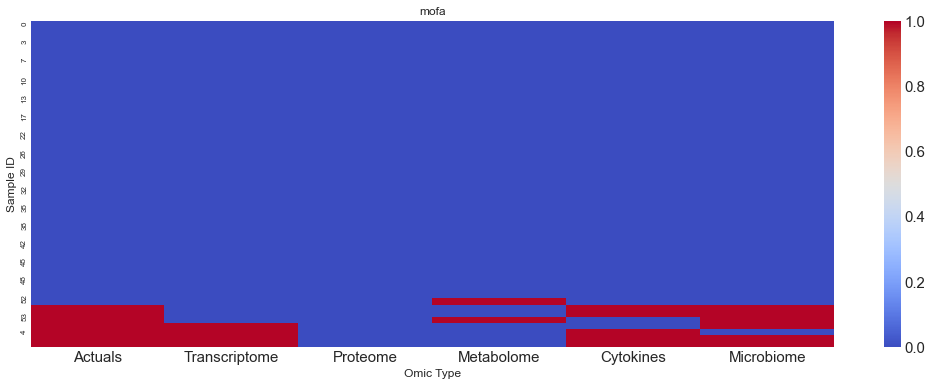

gfa Report
Model val_mean_score val_std_score
('RF', 0.6333333333333333, 0.348010216963685)
f1_score  Cytokine   0.8333333333333333
Model val_mean_score val_std_score
('RF', 0.29999999999999993, 0.37859388972001823)
f1_score  metabolome   0.4444444444444445
Model val_mean_score val_std_score
('RF', 0.7, 0.37859388972001823)
f1_score  Deseq   0.4444444444444445
Model val_mean_score val_std_score
('RF', 0.0, 0.0)
f1_score  proteome   0.25
Model val_mean_score val_std_score
('RF', 0.8333333333333333, 0.3073181485764296)
f1_score  microbiome   0.923076923076923


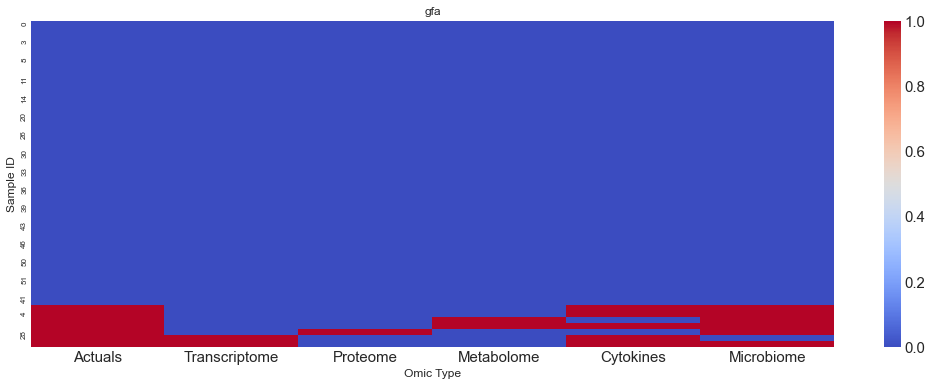

icluster Report
Model val_mean_score val_std_score
('RF', 0.6333333333333333, 0.348010216963685)
f1_score  Cytokine   0.7272727272727273
Model val_mean_score val_std_score
('RF', 0.1, 0.30000000000000004)
f1_score  metabolome   0.0
Model val_mean_score val_std_score
('RF', 0.06666666666666667, 0.19999999999999998)
f1_score  Deseq   0.0
Model val_mean_score val_std_score
('RF', 0.0, 0.0)
f1_score  proteome   0.0
Model val_mean_score val_std_score
('RF', 0.8333333333333333, 0.3073181485764296)
f1_score  microbiome   0.923076923076923


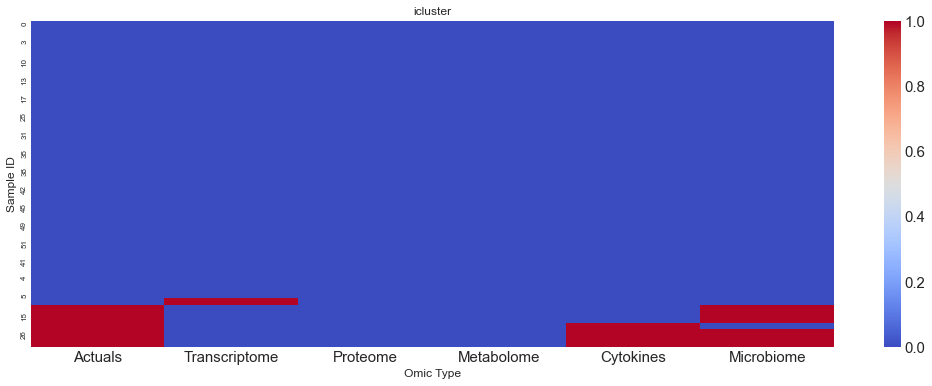

emfr Report
Model val_mean_score val_std_score
('RF', 0.0, 0.0)
f1_score  Cytokine   0.0
Model val_mean_score val_std_score
('RF', 0.7333333333333333, 0.38873012632302)
f1_score  metabolome   0.8421052631578948
Model val_mean_score val_std_score
('RF', 0.7, 0.45825756949558405)
f1_score  Deseq   0.8421052631578948
Model val_mean_score val_std_score
('RF', 0.16666666666666666, 0.3415650255319866)
f1_score  proteome   0.0
Model val_mean_score val_std_score
('RF', 0.7333333333333333, 0.38873012632302)
f1_score  microbiome   0.625


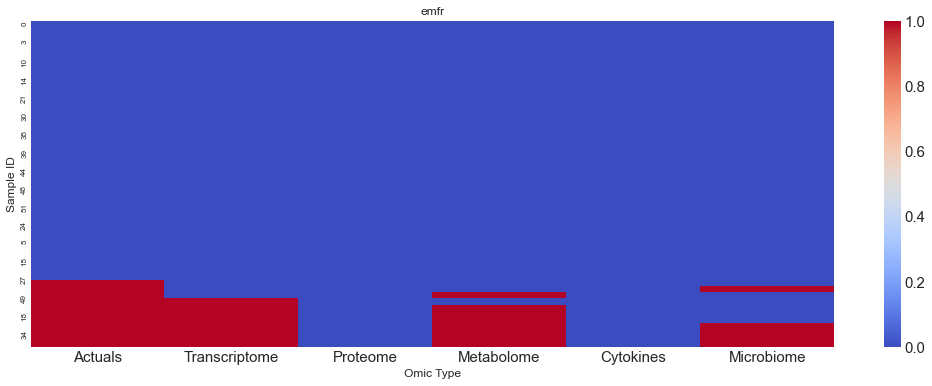

all Report
Model val_mean_score val_std_score
('RF', 0.5333333333333333, 0.3711842908553348)
f1_score  Cytokine   0.7272727272727273
Model val_mean_score val_std_score
('RF', 0.4666666666666666, 0.4)
f1_score  metabolome   0.6
Model val_mean_score val_std_score
('RF', 0.8999999999999998, 0.1527525231651947)
f1_score  Deseq   0.8333333333333333
Model val_mean_score val_std_score
('RF', 0.0, 0.0)
f1_score  proteome   0.0
Model val_mean_score val_std_score
('RF', 0.8, 0.30550504633038933)
f1_score  microbiome   0.923076923076923


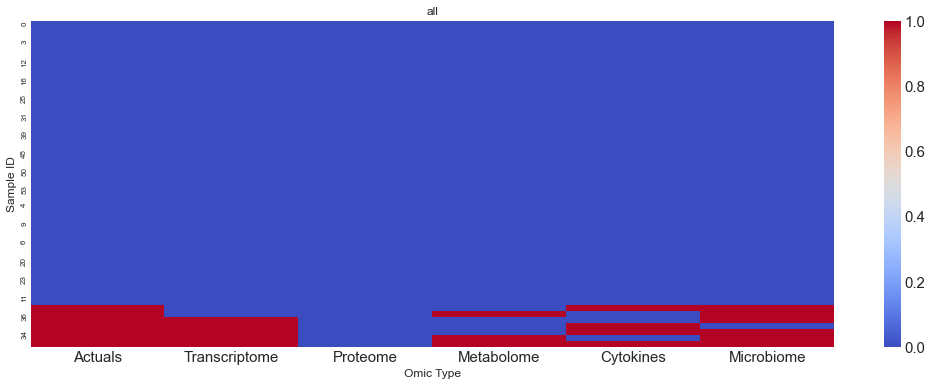

In [28]:
type_predictions = {}
type_score = []
dict_result_method_type_f = {}


for k, dict_df in dict_df_method.items():
    print(k+" Report")
    for type_ in set([i.split('_')[0] for i in X_train.columns]):
        
        X_train, X_test, y_train, y_test=train_test_split(dict_df['full'].drop(['SampleID','label'],axis=1), dict_df['full']['label'],random_state=3,test_size=0.3)
        column_type = [i for i in X_train.columns if type_ in i]
        X_train_type = X_train[column_type]
        X_test_type = X_test[column_type]
        results, Models = ML_Pipeline(X_train_type,y_train,k,test=False,X_test= X_test_type,y_test = y_test,used_models=['RF'],cv_scoring="f1",num_folds = 10,plot=False)
        results["method"] = k
        results["type"] = type_
        dict_result_method_type_f[k+ "_" +type_] = results.loc[[i for i in results.index if 'split' in i],:]
        
        type_score.append([k,type_,f1_score(y_test,Models["RF"].predict(X_test_type)),roc_auc_score(y_test,Models["RF"].predict_proba(X_test_type)[:, 1])])
        print("f1_score ", type_, " ",
              f1_score(y_test,Models["RF"].predict(X_test_type)))
        type_predictions[type_] = Models["RF"].predict(X_test_type)
    type_predictions['actual'] = y_test.values
    type_predictions = pd.DataFrame(type_predictions)
    type_predictions = type_predictions[[
        'actual','Deseq' , 'proteome', 'metabolome', 'Cytokine', 'microbiome'
    ]].sort_values(
        by=['actual','Deseq', 'proteome', 'metabolome', 'Cytokine', 'microbiome'],ascending=True)
    ax = sns.heatmap(type_predictions,cmap="coolwarm")
    ax.set_xticklabels(['Actuals','Transcriptome','Proteome','Metabolome','Cytokines','Microbiome'])
    plt.ylabel('Sample ID')
    plt.xlabel('Omic Type')
    plt.yticks(fontsize=8)
    plt.title(k)
    plt.show()

In [30]:
df_cvresults_method_types_f = pd.concat([results for k, results in dict_result_method_type_f.items()])

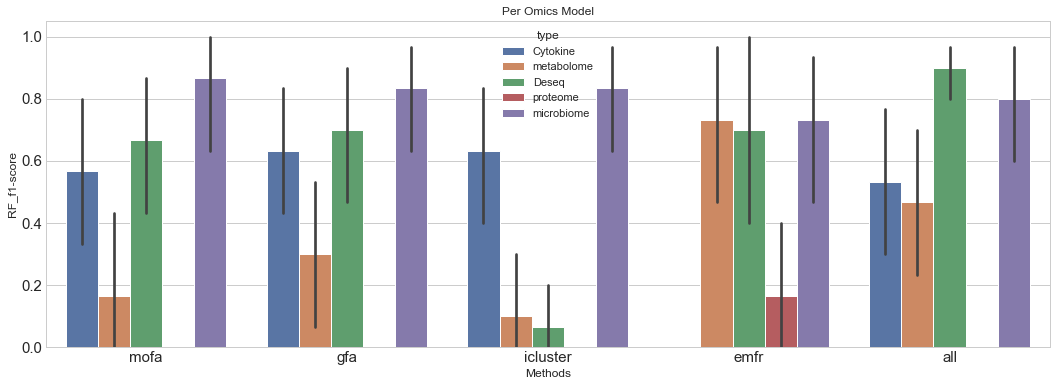

In [32]:
sns.barplot(data=df_cvresults_method_types_f,x='method',y='RF',hue='type')
plt.ylabel('RF_f1-score')
plt.xlabel('Methods')
plt.title('Per Omics Model')
plt.show()

In [33]:
df_cvresults_methods_f1_mofa = df_cvresults_method_types_f[df_cvresults_method_types_f['method'].isin(['mofa','all'])][['method','type','RF']]

In [34]:
df_cvresults_methods_f1_mofa['RF'] = df_cvresults_methods_f1_mofa['RF'].astype(float)

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RF ~ C(method) + C(type) + C(method):C(type)', data=df_cvresults_methods_f1_mofa).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F        PR(>F)
C(method)          0.187778   1.0   1.848117  1.773991e-01
C(type)            9.548889   4.0  23.495140  2.547700e-13
C(method):C(type)  0.562222   4.0   1.383354  2.460396e-01
Residual           9.144444  90.0        NaN           NaN

In [36]:
df_cvresults_methods_f1_gfa = df_cvresults_method_types_f[df_cvresults_method_types_f['method'].isin(['gfa','all'])][['method','type','RF']]
df_cvresults_methods_f1_gfa['RF'] = df_cvresults_methods_f1_gfa['RF'].astype(float)

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RF ~ C(method) + C(type) + C(method):C(type)', data=df_cvresults_methods_f1_gfa).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F        PR(>F)
C(method)          0.054444   1.0   0.534545  4.666014e-01
C(type)            9.188889   4.0  22.554545  6.332085e-13
C(method):C(type)  0.340000   4.0   0.834545  5.067373e-01
Residual           9.166667  90.0        NaN           NaN

In [38]:
df_cvresults_methods_f1_icluster = df_cvresults_method_types_f[df_cvresults_method_types_f['method'].isin(['icluster','all'])][['method','type','RF']]
df_cvresults_methods_f1_icluster['RF'] = df_cvresults_methods_f1_icluster['RF'].astype(float)

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RF ~ C(method) + C(type) + C(method):C(type)', data=df_cvresults_methods_f1_icluster).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F        PR(>F)
C(method)          1.137778   1.0  13.473684  4.098068e-04
C(type)            7.644444   4.0  22.631579  5.873109e-13
C(method):C(type)  3.062222   4.0   9.065789  3.366914e-06
Residual           7.600000  90.0        NaN           NaN

In [40]:
df_cvresults_methods_f1_emfr = df_cvresults_method_types_f[df_cvresults_method_types_f['method'].isin(['emfr','all'])][['method','type','RF']]
df_cvresults_methods_f1_emfr['RF'] = df_cvresults_methods_f1_emfr['RF'].astype(float)

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RF ~ C(method) + C(type) + C(method):C(type)', data=df_cvresults_methods_f1_emfr).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F        PR(>F)
C(method)           0.134444   1.0   1.159744  2.843968e-01
C(type)             7.982222   4.0  17.214058  1.612823e-10
C(method):C(type)   2.004444   4.0   4.322684  3.035131e-03
Residual           10.433333  90.0        NaN           NaN

mofa Report
Model val_mean_score val_std_score
('RF', 0.835120306284957, 0.30636898148865865)
mcc_score  microbiome   0.9161253813129043
Model val_mean_score val_std_score
('RF', 0.067700320038633, 0.20310096011589898)
mcc_score  metabolome   0.14708564032266805
Model val_mean_score val_std_score
('RF', 0.39042986762525783, 0.3993224985648355)
mcc_score  Cytokine   0.21624465054518335
Model val_mean_score val_std_score
('RF', 0.0, 0.0)
mcc_score  proteome   0.0
Model val_mean_score val_std_score
('RF', 0.7725005713088869, 0.14893710507068766)
mcc_score  Deseq   0.7329003050503234


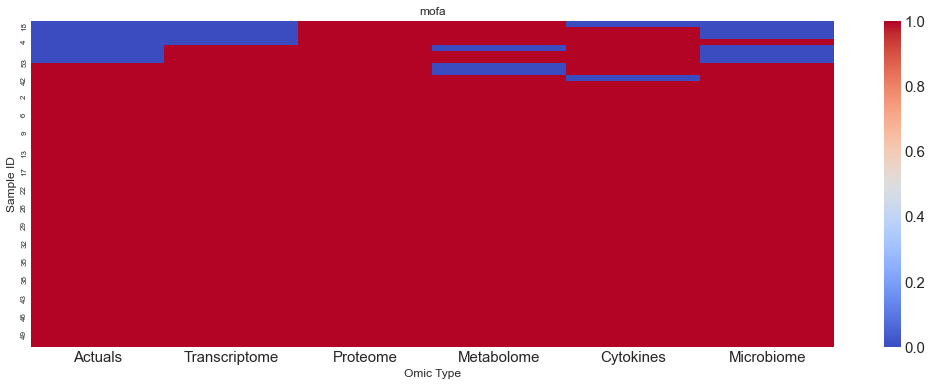

gfa Report
Model val_mean_score val_std_score
('RF', 0.835120306284957, 0.30636898148865865)
mcc_score  microbiome   0.9161253813129043
Model val_mean_score val_std_score
('RF', 0.8028206263235902, 0.3043028985576878)
mcc_score  metabolome   1.0
Model val_mean_score val_std_score
('RF', 0.2699602787776056, 0.3306333582373187)
mcc_score  Cytokine   0.35592785240635266
Model val_mean_score val_std_score
('RF', 0.0, 0.0)
mcc_score  proteome   0.0
Model val_mean_score val_std_score
('RF', 0.7702406125699144, 0.29883968331478433)
mcc_score  Deseq   0.628456826833218


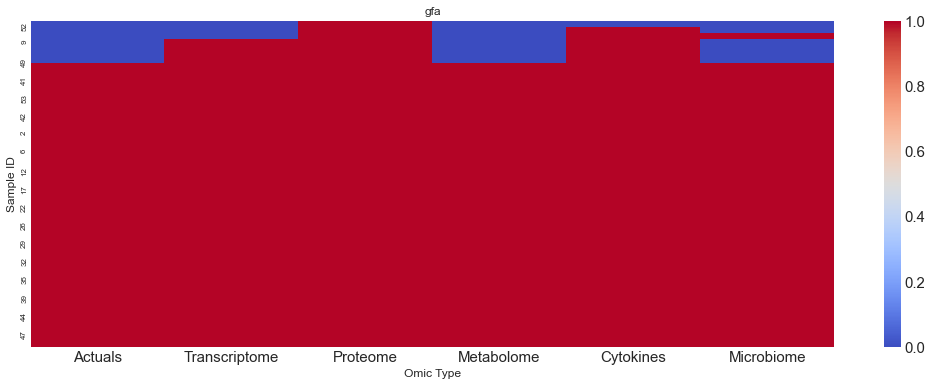

icluster Report
Model val_mean_score val_std_score
('RF', 0.8674199862463242, 0.3050198565912917)
mcc_score  microbiome   0.9161253813129043
Model val_mean_score val_std_score
('RF', 0.1, 0.30000000000000004)
mcc_score  metabolome   0.0
Model val_mean_score val_std_score
('RF', 0.46996027877760554, 0.40166441971905464)
mcc_score  Cytokine   0.35592785240635266
Model val_mean_score val_std_score
('RF', 0.0, 0.0)
mcc_score  proteome   0.0
Model val_mean_score val_std_score
('RF', 0.1348399724926484, 0.26967994498529685)
mcc_score  Deseq   0.0


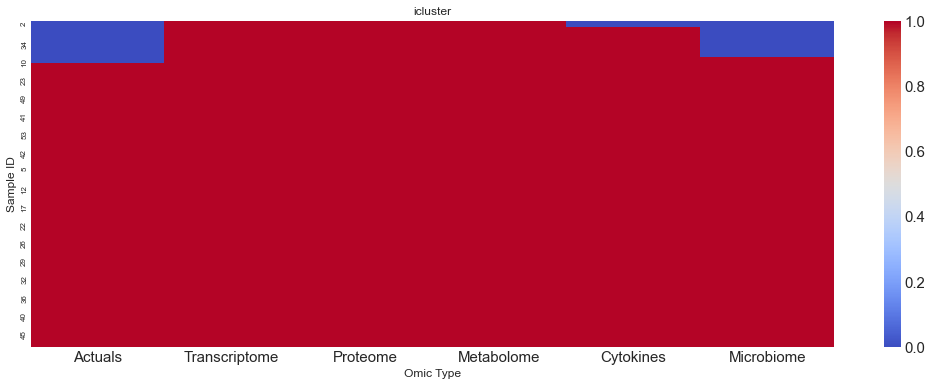

emfr Report
Model val_mean_score val_std_score
('RF', 0.835400640077266, 0.30622285549116174)
mcc_score  microbiome   0.7630236097353343
Model val_mean_score val_std_score
('RF', 0.835400640077266, 0.30622285549116174)
mcc_score  metabolome   0.6315748787422248
Model val_mean_score val_std_score
('RF', 0.7354006400772659, 0.3883974320726311)
mcc_score  Cytokine   0.7630236097353343
Model val_mean_score val_std_score
('RF', 0.1, 0.30000000000000004)
mcc_score  proteome   0.0
Model val_mean_score val_std_score
('RF', 0.767700320038633, 0.3955623237189227)
mcc_score  Deseq   0.8842048302391148


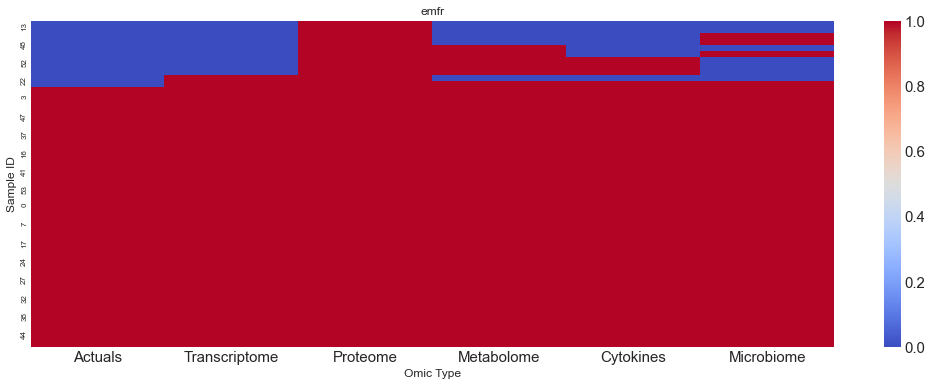

all Report
Model val_mean_score val_std_score
('RF', 0.8674199862463242, 0.3050198565912917)
mcc_score  microbiome   0.9161253813129043
Model val_mean_score val_std_score
('RF', 0.5699602787776056, 0.3966639009447719)
mcc_score  metabolome   0.7329003050503234
Model val_mean_score val_std_score
('RF', 0.5699602787776056, 0.3966639009447719)
mcc_score  Cytokine   0.628456826833218
Model val_mean_score val_std_score
('RF', 0.0, 0.0)
mcc_score  proteome   0.0
Model val_mean_score val_std_score
('RF', 0.9025402925312813, 0.1488739218264005)
mcc_score  Deseq   0.9161253813129043


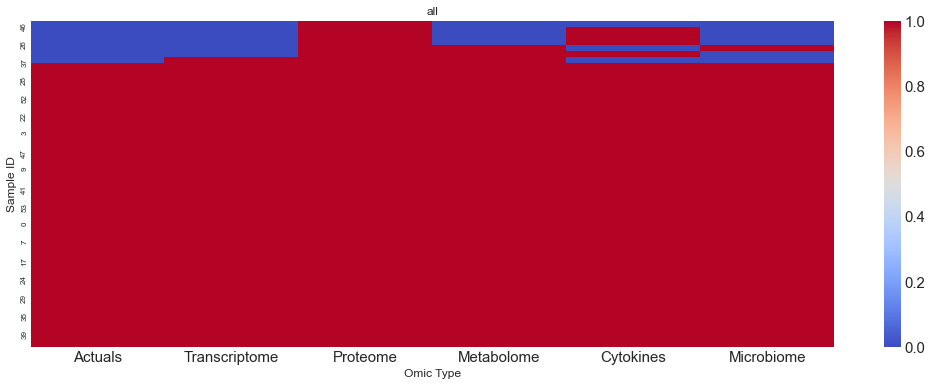

In [36]:
type_predictions = {}
dict_result_method_type = {}
type_score = []
mcc = make_scorer(matthews_corrcoef)

for k, dict_df in dict_df_method.items():
    print(k+" Report")
    for type_ in set([i.split('_')[0] for i in X_train.columns]):
        X_train, X_test, y_train, y_test=train_test_split(dict_df['full'].drop(['SampleID','label'],axis=1), dict_df['full']['label'],random_state=3,test_size=0.3)
        column_type = [i for i in X_train.columns if type_ in i]
        X_train_type = X_train[column_type]
        X_test_type = X_test[column_type]
        results, Models = ML_Pipeline(X_train_type,y_train,k,test=False,X_test= X_test_type,y_test = y_test,used_models=['RF'],cv_scoring=mcc,num_folds = 10,plot=False)
        results["method"] = k
        results["type"] = type_
        dict_result_method_type[k+ "_" +type_] = results.loc[[i for i in results.index if 'split' in i],:]
        
        type_score.append([k,type_,f1_score(y_test,Models["RF"].predict(X_test_type)),roc_auc_score(y_test,Models["RF"].predict_proba(X_test_type)[:, 1])])
        print("mcc_score ", type_, " ",
              matthews_corrcoef(y_test,Models["RF"].predict(X_test_type)))
        type_predictions[type_] = Models["RF"].predict(X_test_type)
    type_predictions['actual'] = y_test.values
    type_predictions = pd.DataFrame(type_predictions)
    type_predictions = type_predictions[[
        'actual','Deseq' , 'proteome', 'metabolome', 'Cytokine', 'microbiome'
    ]].sort_values(
        by=['actual','Deseq', 'proteome', 'metabolome', 'Cytokine', 'microbiome'],ascending=True)
    ax = sns.heatmap(type_predictions,cmap="coolwarm")
    ax.set_xticklabels(['Actuals','Transcriptome','Proteome','Metabolome','Cytokines','Microbiome'])
    plt.ylabel('Sample ID')
    plt.xlabel('Omic Type')
    plt.yticks(fontsize=8)
    plt.title(k)
    plt.show()

In [37]:
df_cvresults_method_types_mcc = pd.concat([results for k, results in dict_result_method_type.items()])

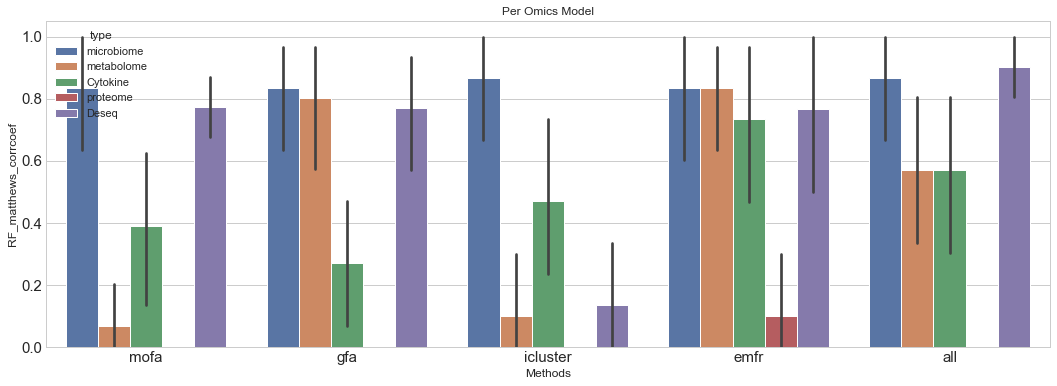

In [38]:
sns.barplot(data=df_cvresults_method_types_mcc,x='method',y='RF',hue='type')
plt.ylabel('RF_matthews_corrcoef')
plt.xlabel('Methods')
plt.title('Per Omics Model')
plt.show()

In [59]:
df_cvresults_methods_mcc_mofa = df_cvresults_method_types_mcc[df_cvresults_method_types_mcc['method'].isin(['mofa','emfr'])][['method','type','RF']]

In [65]:
df_cvresults_methods_mcc_mofa['RF'] = df_cvresults_methods_mcc_mofa['RF'].astype(float)

In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RF ~ C(method) + C(type) + C(method):C(type)', data=df_cvresults_methods_mcc_mofa).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F        PR(>F)
C(method)          1.459629   1.0  14.570072  2.475769e-04
C(type)            7.767826   4.0  19.384680  1.565716e-11
C(method):C(type)  2.132329   4.0   5.321247  6.821063e-04
Residual           9.016197  90.0        NaN           NaN

In [67]:
df_cvresults_methods_mcc_gfa = df_cvresults_method_types_mcc[df_cvresults_method_types_mcc['method'].isin(['gfa','emfr'])][['method','type','RF']]
df_cvresults_methods_mcc_gfa['RF'] = df_cvresults_methods_mcc_gfa['RF'].astype(float)

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RF ~ C(method) + C(type) + C(method):C(type)', data=df_cvresults_methods_mcc_gfa).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F        PR(>F)
C(method)          0.354930   1.0   3.293330  7.289314e-02
C(type)            8.875282   4.0  20.587996  4.512248e-12
C(method):C(type)  0.783583   4.0   1.817678  1.323018e-01
Residual           9.699528  90.0        NaN           NaN

In [71]:
df_cvresults_methods_mcc_icluster = df_cvresults_method_types_mcc[df_cvresults_method_types_mcc['method'].isin(['gfa','icluster'])][['method','type','RF']]
df_cvresults_methods_mcc_icluster['RF'] = df_cvresults_methods_mcc_icluster['RF'].astype(float)

In [72]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RF ~ C(method) + C(type) + C(method):C(type)', data=df_cvresults_methods_mcc_icluster).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F        PR(>F)
C(method)          1.223063   1.0  13.721985  3.653657e-04
C(type)            7.336331   4.0  20.577244  4.562018e-12
C(method):C(type)  3.470608   4.0   9.734504  1.373444e-06
Residual           8.021845  90.0        NaN           NaN

In [73]:
df_cvresults_methods_mcc_all = df_cvresults_method_types_mcc[df_cvresults_method_types_mcc['method'].isin(['all','icluster'])][['method','type','RF']]
df_cvresults_methods_mcc_all['RF'] = df_cvresults_methods_mcc_all['RF'].astype(float)

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RF ~ C(method) + C(type) + C(method):C(type)', data=df_cvresults_methods_mcc_all).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F        PR(>F)
C(method)          1.789336   1.0  19.013379  3.444194e-05
C(type)            7.991315   4.0  21.228813  2.357633e-12
C(method):C(type)  2.311796   4.0   6.141253  2.045865e-04
Residual           8.469837  90.0        NaN           NaN

In [42]:
df_cvresults_methods_mcc_mofa = pd.pivot(df_cvresults_method_types_mcc[df_cvresults_method_types_mcc['method'] == 'mofa'],columns='type',values='RF')

In [43]:
f_oneway(*[df_cvresults_methods_mcc_mofa[c] for c in df_cvresults_methods_mcc_mofa.columns])

F_onewayResult(statistic=21.229605554866573, pvalue=6.851307690421835e-10)

In [45]:
df_cvresults_methods_mcc_gfa = pd.pivot(df_cvresults_method_types_mcc[df_cvresults_method_types_mcc['method'] == 'gfa'],columns='type',values='RF')

In [46]:
f_oneway(*[df_cvresults_methods_mcc_gfa[c] for c in df_cvresults_methods_mcc_gfa.columns])

F_onewayResult(statistic=16.757518913352285, pvalue=1.7680242490665862e-08)

In [47]:
df_cvresults_methods_mcc_icluster = pd.pivot(df_cvresults_method_types_mcc[df_cvresults_method_types_mcc['method'] == 'icluster'],columns='type',values='RF')

In [48]:
f_oneway(*[df_cvresults_methods_mcc_icluster[c] for c in df_cvresults_methods_mcc_icluster.columns])

F_onewayResult(statistic=13.67715742218376, pvalue=2.2445368502153407e-07)

In [50]:
df_cvresults_methods_mcc_emfr = pd.pivot(df_cvresults_method_types_mcc[df_cvresults_method_types_mcc['method'] == 'emfr'],columns='type',values='RF')

In [51]:
f_oneway(*[df_cvresults_methods_mcc_emfr[c] for c in df_cvresults_methods_mcc_emfr.columns])

F_onewayResult(statistic=7.545545704891097, pvalue=9.685321154775425e-05)

In [53]:
df_cvresults_methods_mcc_all = pd.pivot(df_cvresults_method_types_mcc[df_cvresults_method_types_mcc['method'] == 'all'],columns='type',values='RF')

In [54]:
f_oneway(*[df_cvresults_methods_mcc_all[c] for c in df_cvresults_methods_mcc_all.columns])

F_onewayResult(statistic=13.692674653378539, pvalue=2.2143756613162973e-07)

In [39]:
df_cvresults_method_types_mcc

RF method        type
split0_test_score         1   mofa  microbiome
split1_test_score  0.677003   mofa  microbiome
split2_test_score         0   mofa  microbiome
split3_test_score         1   mofa  microbiome
split4_test_score         1   mofa  microbiome
...                     ...    ...         ...
split5_test_score         1    all       Deseq
split6_test_score    0.6742    all       Deseq
split7_test_score         1    all       Deseq
split8_test_score         1    all       Deseq
split9_test_score    0.6742    all       Deseq

[250 rows x 3 columns]

In [189]:
df_type_score = pd.DataFrame(type_score,columns=['Method','Omic','f1-score','ROC-AUC'])

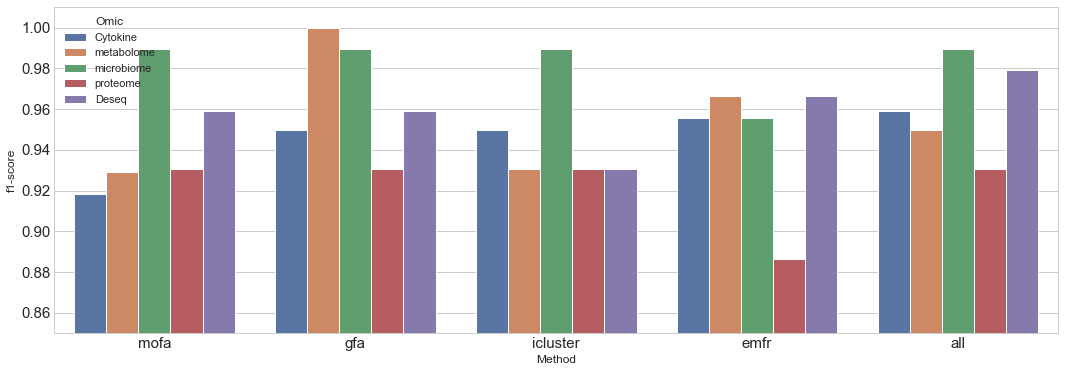

In [199]:
sns.barplot(data=df_type_score,x='Method',y='f1-score',hue='Omic')
plt.ylim(0.85,1.01)
plt.show()

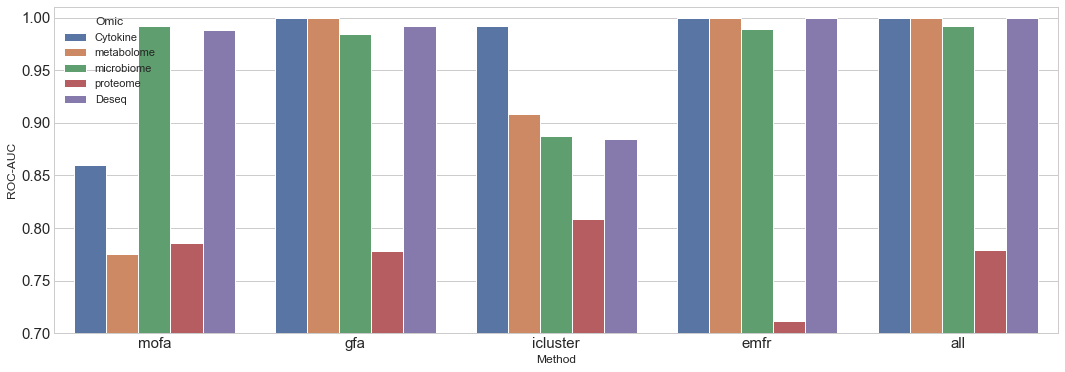

In [200]:
sns.barplot(data=df_type_score,x='Method',y='ROC-AUC',hue='Omic')
plt.ylim(0.7,1.01)
plt.show()

In [15]:
import shap

In [18]:
k= 'gfa'
X = dict_df_method[k]['full'].drop(['SampleID','label'],axis=1)

explainer = shap.TreeExplainer(dict_model_method[k]['RF'],X)
shap_values = explainer.shap_values(X)

In [36]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[0],X)

In [19]:
dict_df_method[k]['full']['label'].value_counts()

False    153
True      24
Name: label, dtype: int64

In [20]:
clus_pt_dict = {}

In [21]:
old_clus = [["ZN3TBJM-11", "ZN9YTFN-01", "ZN9YTFN-09"],
            ["ZJXC41N-11", "ZK4CK8Y-08", "ZK4CK8Y-09"],
            ["ZKFV71L-05", "ZKFV71L-07", "ZKFV71L-09"],
            ["ZKVR426-07", "ZKVR426-09", "ZKVR426-10"]]
new_clus = [[
    "ZL63I8R-06", "ZL63I8R-07", "ZL63I8R-09", "ZL63I8R-11", "ZL63I8R-12",
    "ZL63I8R-14", "ZL63I8R-15", "ZL9BTWF-07", "ZL9BTWF-09", "ZL9BTWF-10"
],
            [
                "ZKFV71L-05", "ZKFV71L-07", "ZKFV71L-09", "ZKFV71L-12",
                "ZKFV71L-2011", "ZKFV71L-6011", "ZKFV71L-6021", "ZKVR426-06",
                "ZKVR426-07", "ZKVR426-09"
            ]]

In [22]:
for c, clus in enumerate(new_clus):
    for p , pt in enumerate(clus):
        clus_pt_dict[str(c)+"_"+str(p)] = dict_df_method[k]['full'][dict_df_method[k]['full']['SampleID'] == pt].index[0]

In [24]:
clus_pt_dict

{'0_0': 19,
 '0_1': 20,
 '0_2': 21,
 '0_3': 22,
 '0_4': 23,
 '0_5': 24,
 '0_6': 25,
 '0_7': 26,
 '0_8': 27,
 '0_9': 28,
 '1_0': 3,
 '1_1': 4,
 '1_2': 5,
 '1_3': 6,
 '1_4': 7,
 '1_5': 8,
 '1_6': 9,
 '1_7': 10,
 '1_8': 11,
 '1_9': 12}

In [30]:
X

Deseq_FLNA  Deseq_LGALS8  Deseq_LYZ  Deseq_PRR26  Deseq_PRKAG1  \
0      0.771053      0.847576  -0.869735    -0.611444     -0.779554   
1     -0.500605     -0.461632  -0.132316     0.601910     -0.779554   
2     -0.300518     -0.218071   1.430198    -0.611444     -0.019928   
3     -0.754409     -0.002120  -0.956369     0.404079      0.302078   
4      0.018049     -0.528454  -1.437829     2.101106     -0.779554   
..          ...           ...        ...          ...           ...   
172   -0.043174     -0.134774  -1.261133    -0.495143     -0.851462   
173   -0.600699     -1.028369   0.597925    -0.495143     -0.851462   
174    1.848929      1.078701   1.038572     0.690382      0.363234   
175   -1.262857     -0.360777   0.500212     0.267727     -0.069821   
176    3.169956     -0.820924   1.360511     0.513153      1.421168   

     Deseq_HCFC1R1  Deseq_CASC14  Deseq_LINC01271  Deseq_MNS1  Deseq_CDR1  \
0        -1.817500      1.526843         0.263228    0.249230    1.014544   
1         0.215523     -0.938543         0.735900    0.587313   -0.291089   
2         1.050479     -0.938543         0.912289   -0.405691   -1.162489   
3        -0.714205     -0.938543        -1.509295    1.603931    0.334364   
4        -0.567570     -0.938543        -0.146488   -0.433128    1.065303   
..             ...           ...              ...         ...         ...   
172       0.223583     -0.874020        -1.283429   -0.195630    2.325514   
173      -0.170262     -0.186958        -1.283429   -1.279580   -0.502653   
174      -3.748476      0.768437        -1.283429    1.126513   -1.527697   
175       0.192589     -0.874020         0.033457   -0.283277   -0.192371   
176       0.024195     -0.874020        -1.283429    0.206994   -0.203315   

     ...  Cytokine_IP10  Cytokine_CHEX1  Cytokine_IL12P40  Cytokine_PDGFBB  \
0    ...      -0.915602       -0.337565         -0.360917        -1.114354   
1    ...      -1.455258       -0.160573         -1.892147        -0.987801   
2    ...      -1.565957       -0.006383         -1.892147        -1.154743   
3    ...      -0.242762        0.191068         -0.030190         2.098368   
4    ...      -0.401891        0.141718         -0.116686         0.234321   
..   ...            ...             ...               ...              ...   
172  ...      -0.061072       -0.241812          1.068712        -0.301896   
173  ...       0.163095       -0.499712          1.360977         0.430868   
174  ...       2.346654       -0.582514          2.526160         1.692214   
175  ...      -1.121894       -0.455924          0.081328         0.364881   
176  ...       0.242781       -0.685976          0.479052         2.169806   

     Cytokine_CHEX4  Cytokine_MIP1B  Cytokine_IFNB  Cytokine_CD40L  \
0         -0.122641        0.918541      -0.406385       -0.324198   
1          0.255327       -0.837724      -0.098933        0.039657   
2          0.633295       -0.984079      -0.208567       -0.265035   
3         -0.469112       -0.345695      -0.428159       -0.493999   
4         -0.815582       -0.721409      -0.472901       -0.578936   
..              ...             ...            ...             ...   
172        0.223527        0.811805       0.513574        0.514712   
173        0.223527        0.755412       0.701978        0.592646   
174       -0.239718        2.995434       2.087954        1.195747   
175        0.127103       -0.723649       0.081421        0.589400   
176       -0.056307       -0.134993       0.907640        1.105247   

     Cytokine_GCSF  Cytokine_RESISTIN  
0        -0.909904          -0.928634  
1        -0.554575          -0.542334  
2        -0.643407          -1.203996  
3        -0.642754          -0.562754  
4        -0.569271          -0.851907  
..             ...                ...  
172       1.057880          -0.537434  
173       0.942781          -0.581548  
174       2.672854          -0.245704  
175      -0.467570          -0.682234  
176      

In [37]:
df_shap = pd.DataFrame(shap_values[0], columns = X.columns,index=X.index)
top_shap = df_shap.mean(axis=0).abs().sort_values(ascending=False)[:20].index

In [38]:
df_shap_filt = df_shap.loc[list(clus_pt_dict.values()),top_shap]
df_shap_filt['pts'] = clus_pt_dict.keys()
df_shap_filt = df_shap_filt.set_index('pts')

In [39]:
df_shap_filt_stack = df_shap_filt.stack().reset_index()
df_shap_filt_stack.columns = ["Patients",'Feature',"Shap"]
df_shap_filt_stack['Cluster'] = df_shap_filt_stack['Patients'].str.split("_").str[0]

<function matplotlib.pyplot.show(close=None, block=None)>

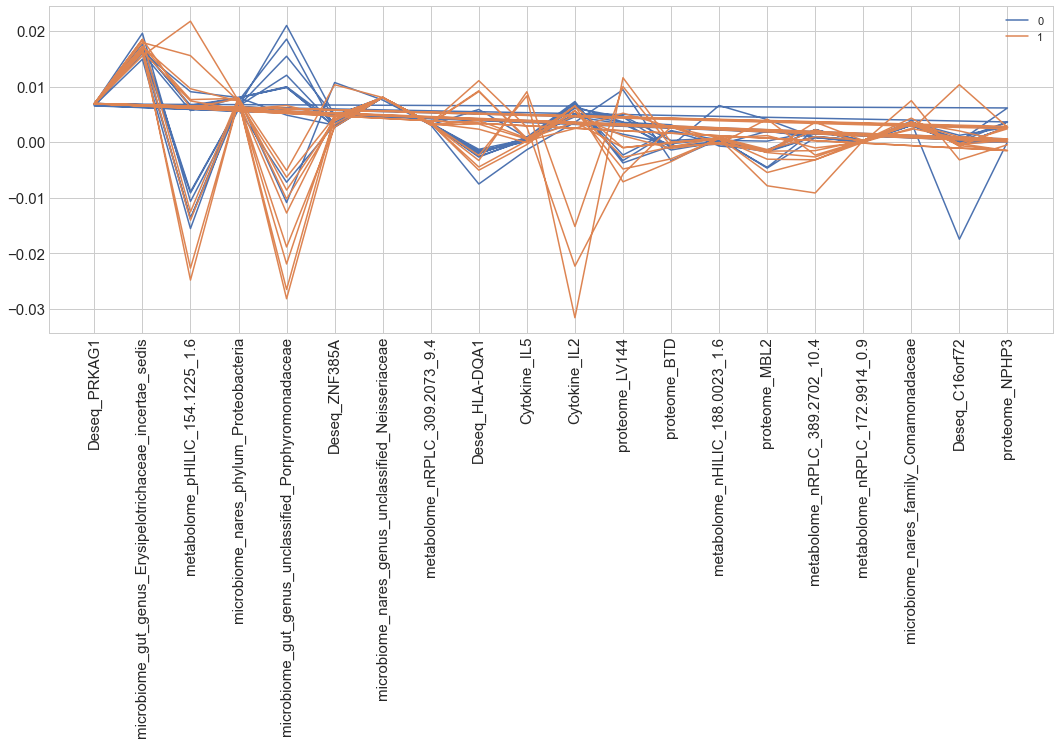

In [40]:
for i in df_shap_filt_stack['Cluster'].unique():
    plt.plot(df_shap_filt_stack.loc[df_shap_filt_stack['Cluster'] == i,'Feature'],df_shap_filt_stack.loc[df_shap_filt_stack['Cluster'] == i,"Shap"],label=i)
plt.legend()
plt.xticks(rotation=90)
plt.show

In [33]:
df_filt = X.loc[list(clus_pt_dict.values()),top_shap]
df_filt['pts'] = clus_pt_dict.keys()
df_filt = df_filt.set_index('pts')

In [34]:
df_filt_stack = df_filt.stack().reset_index()
df_filt_stack.columns = ["Patients",'Feature',"Value"]
df_filt_stack['Cluster'] = df_filt_stack['Patients'].str.split("_").str[0]

<function matplotlib.pyplot.show(close=None, block=None)>

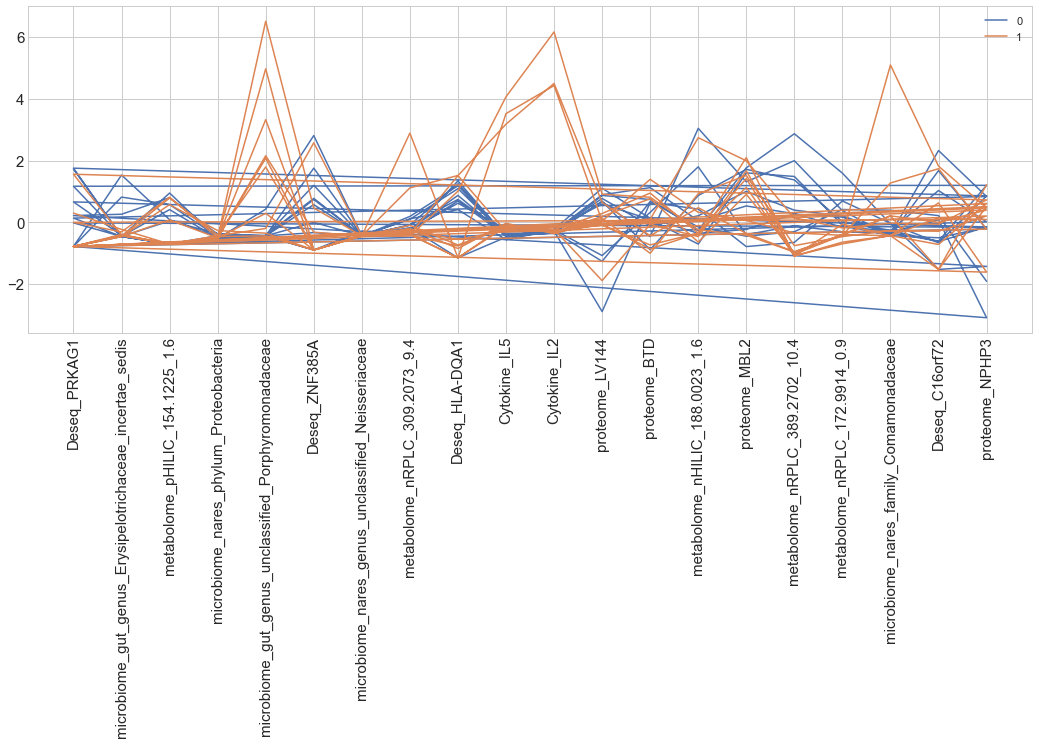

In [35]:
for i in df_filt_stack['Cluster'].unique():
    plt.plot(df_filt_stack.loc[df_filt_stack['Cluster'] == i,'Feature'],df_filt_stack.loc[df_filt_stack['Cluster'] == i,"Value"],label=i)
plt.legend()
plt.xticks(rotation=90)
plt.show

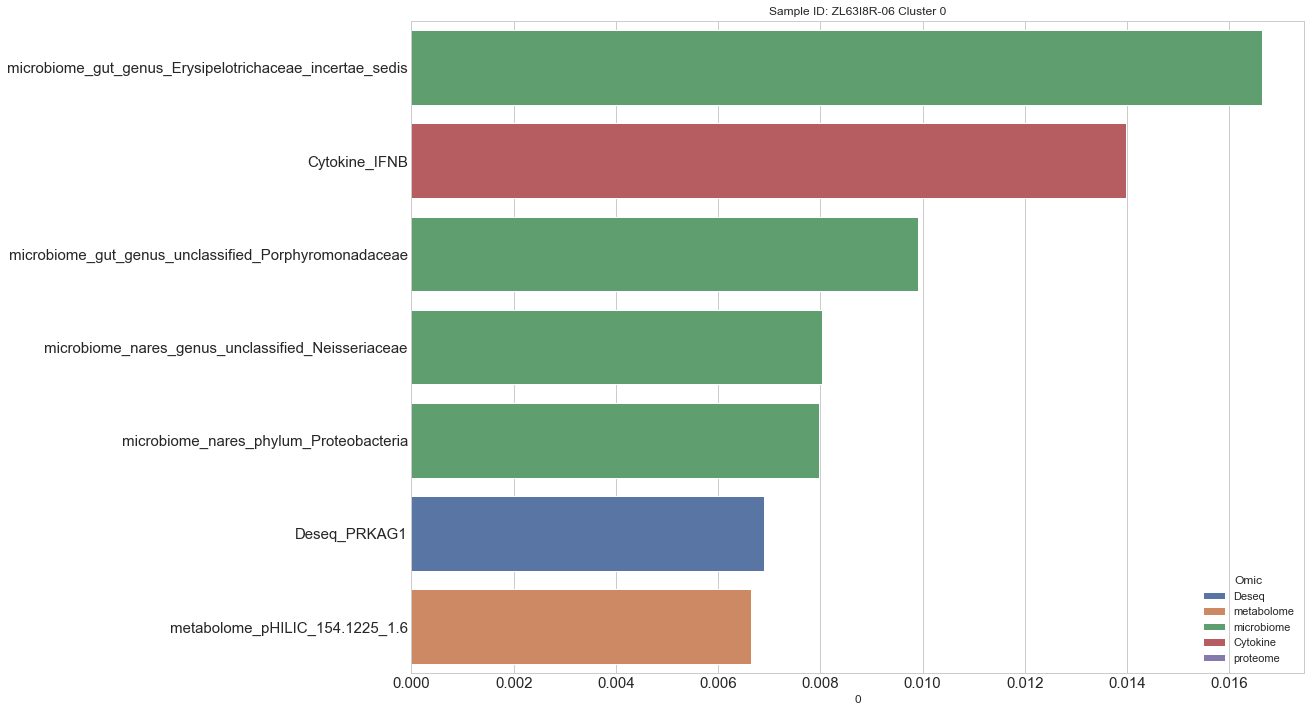

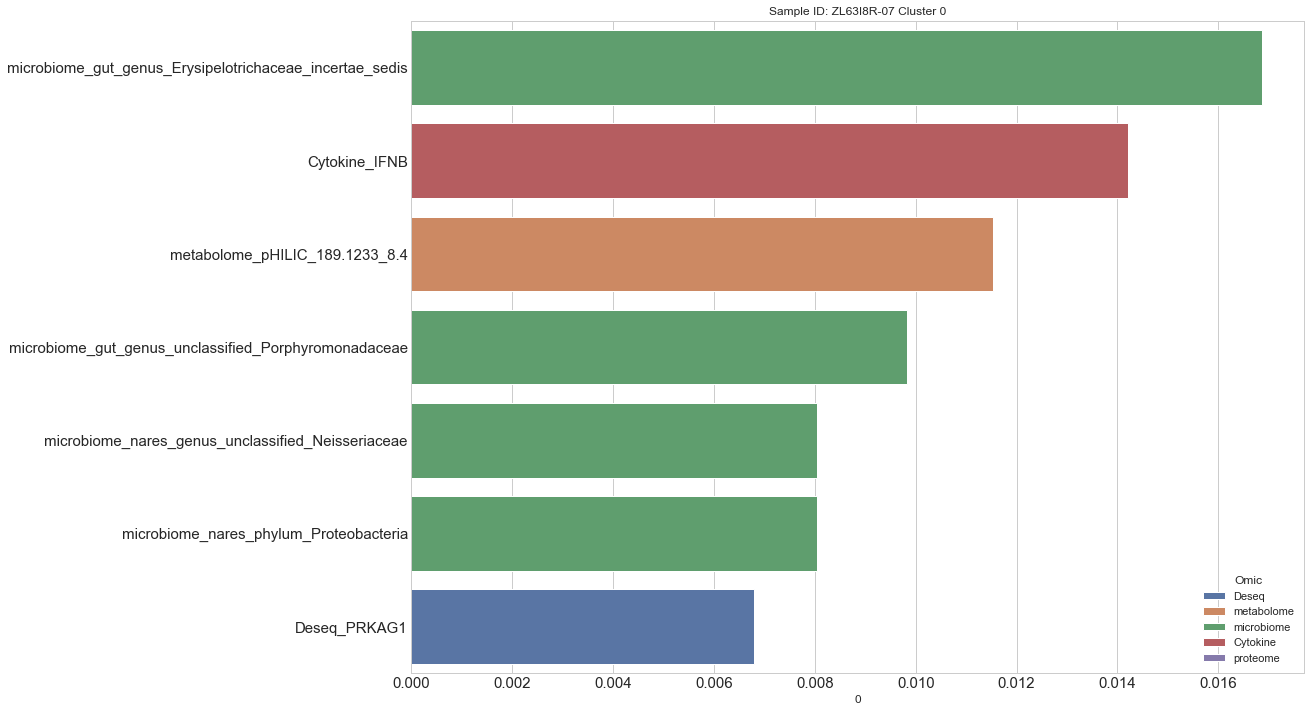

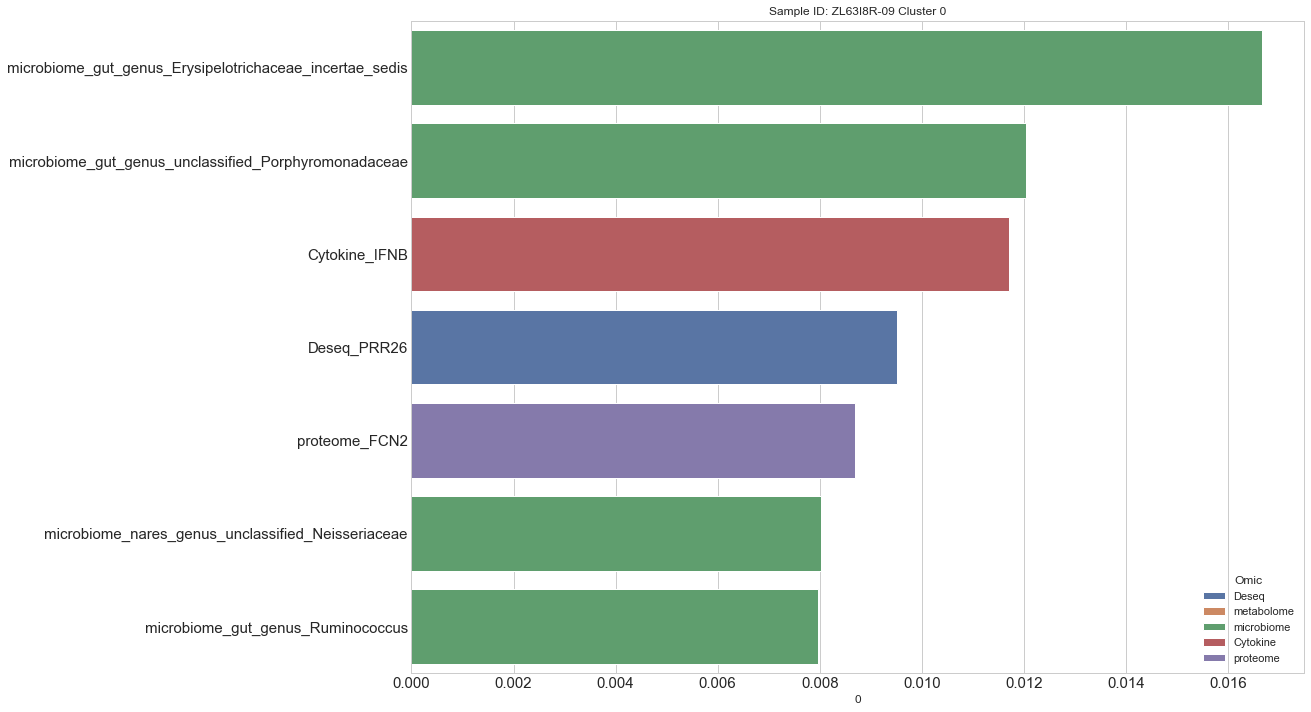

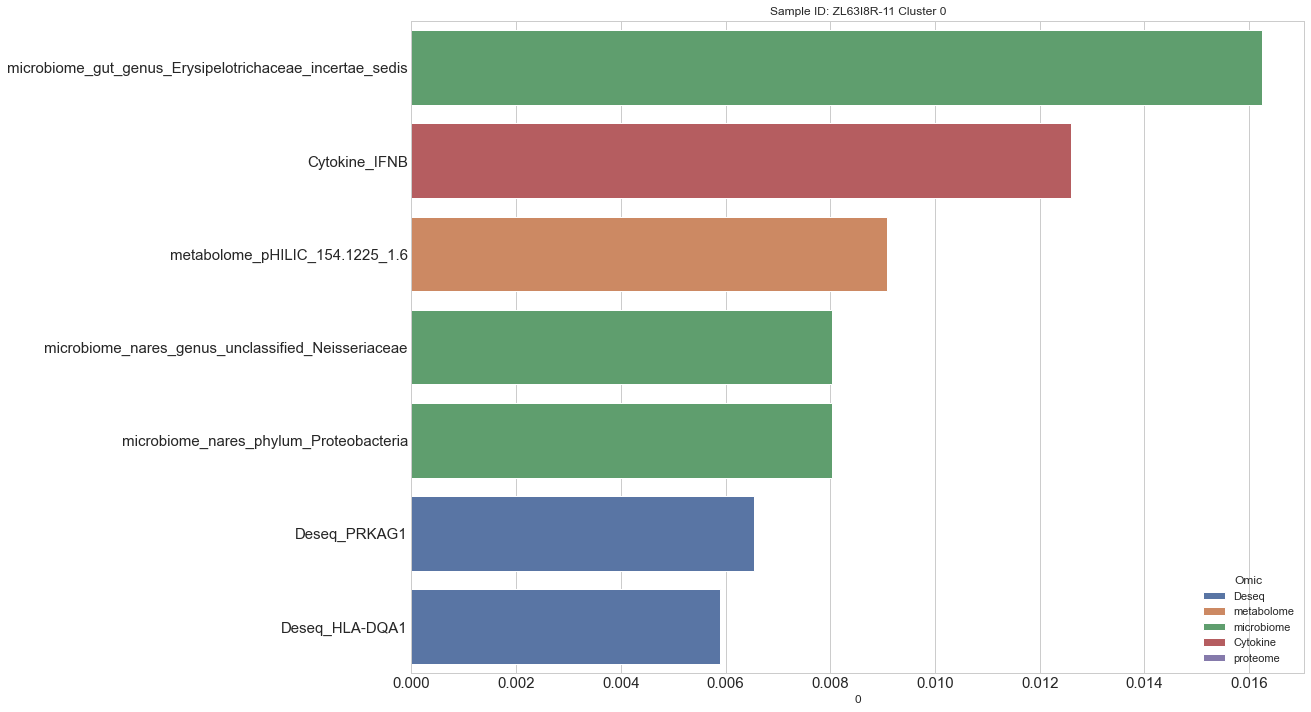

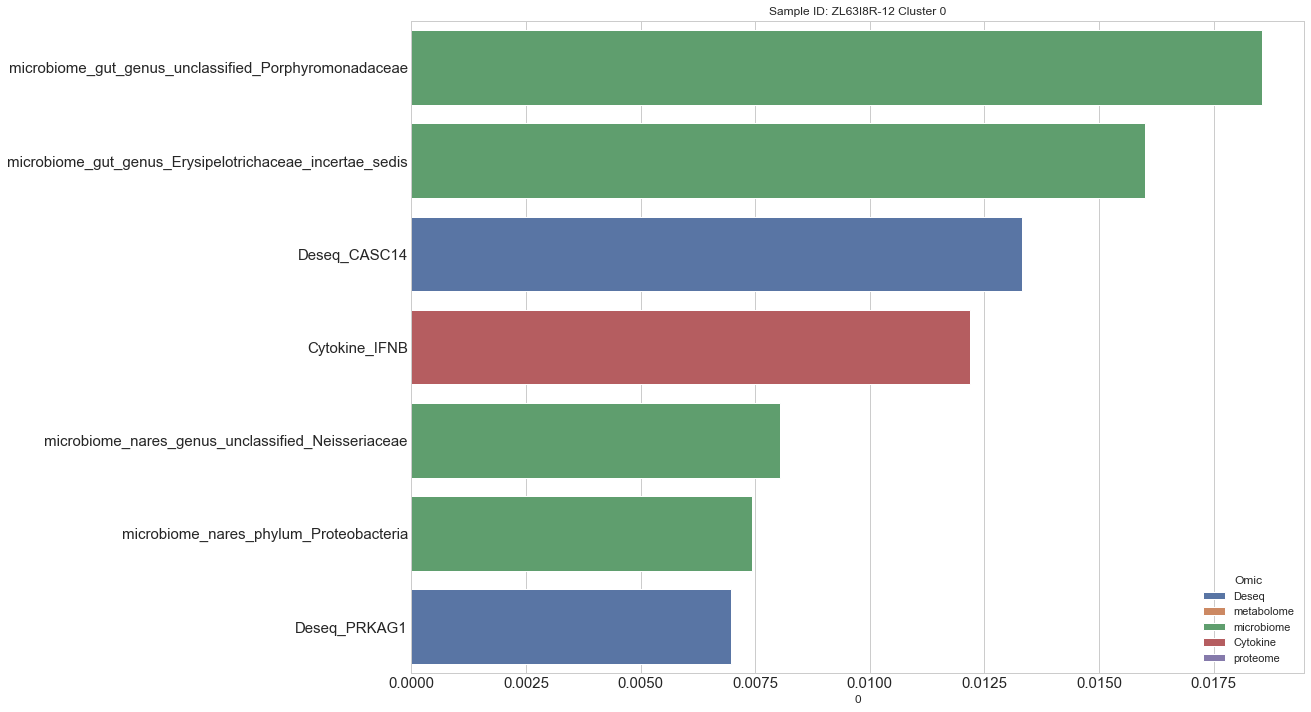

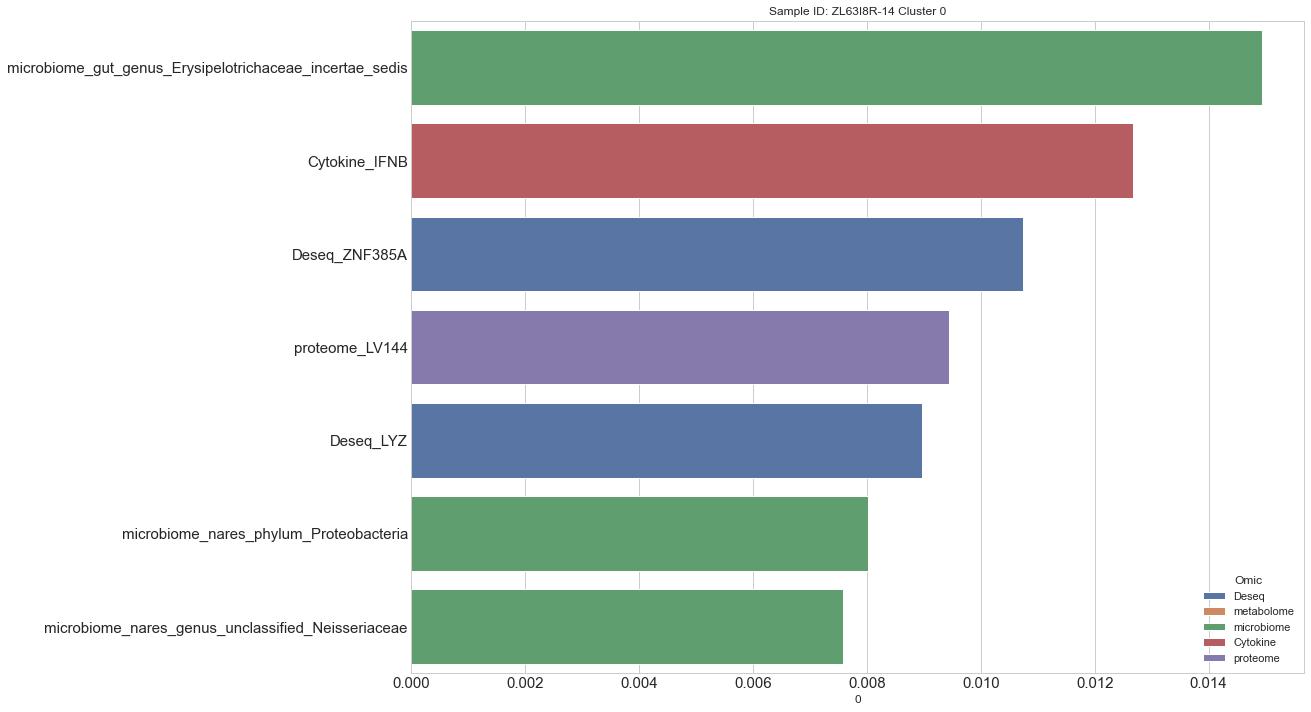

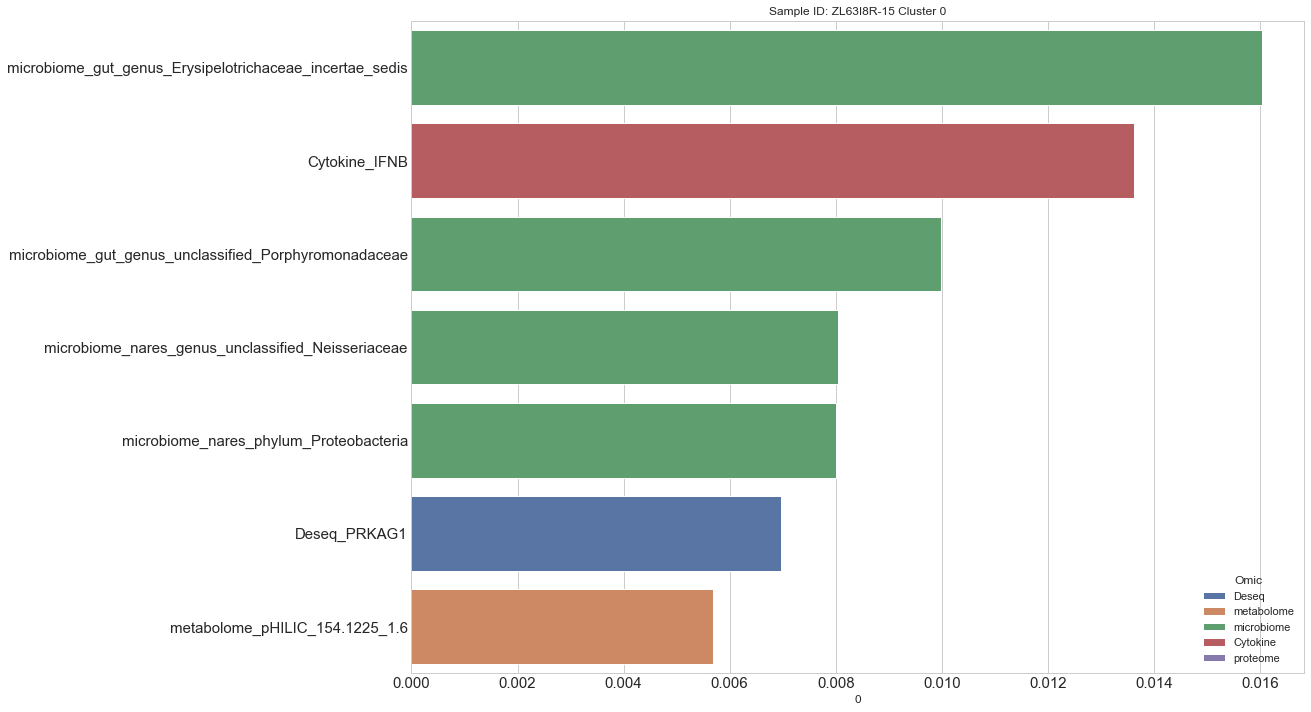

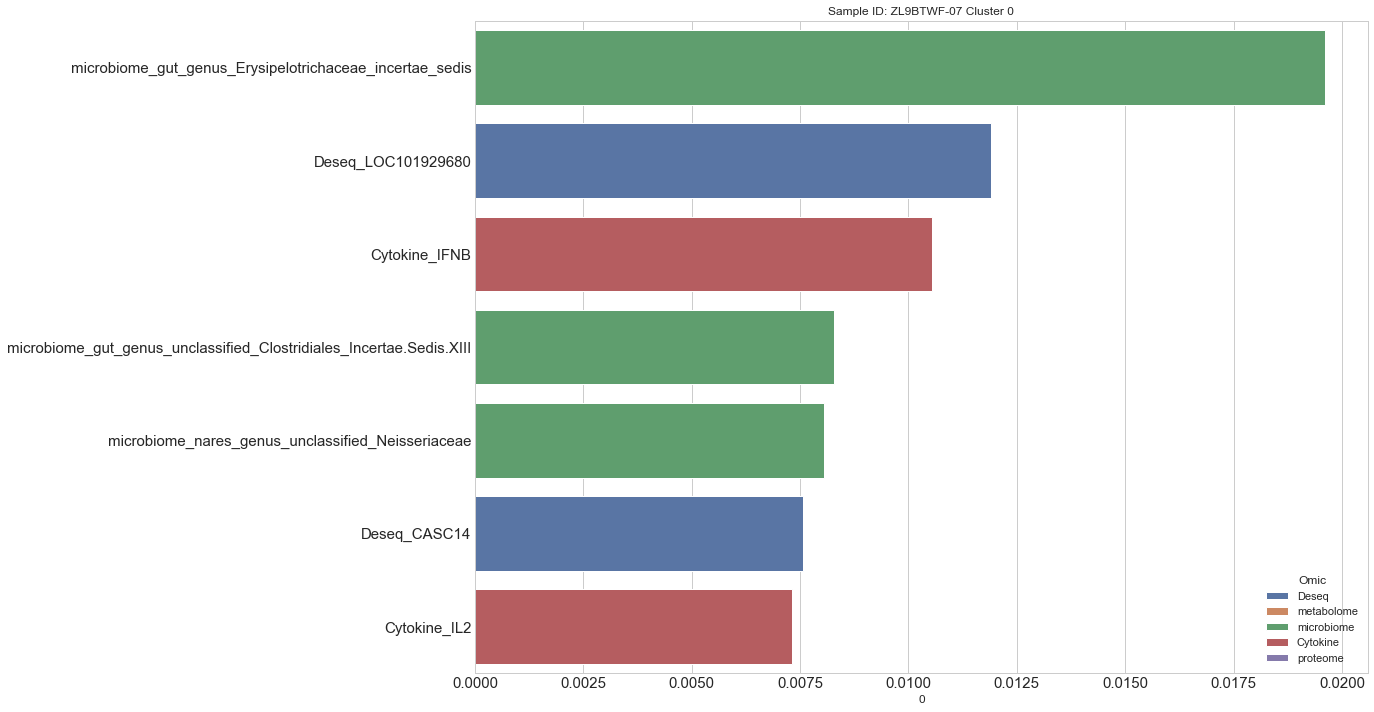

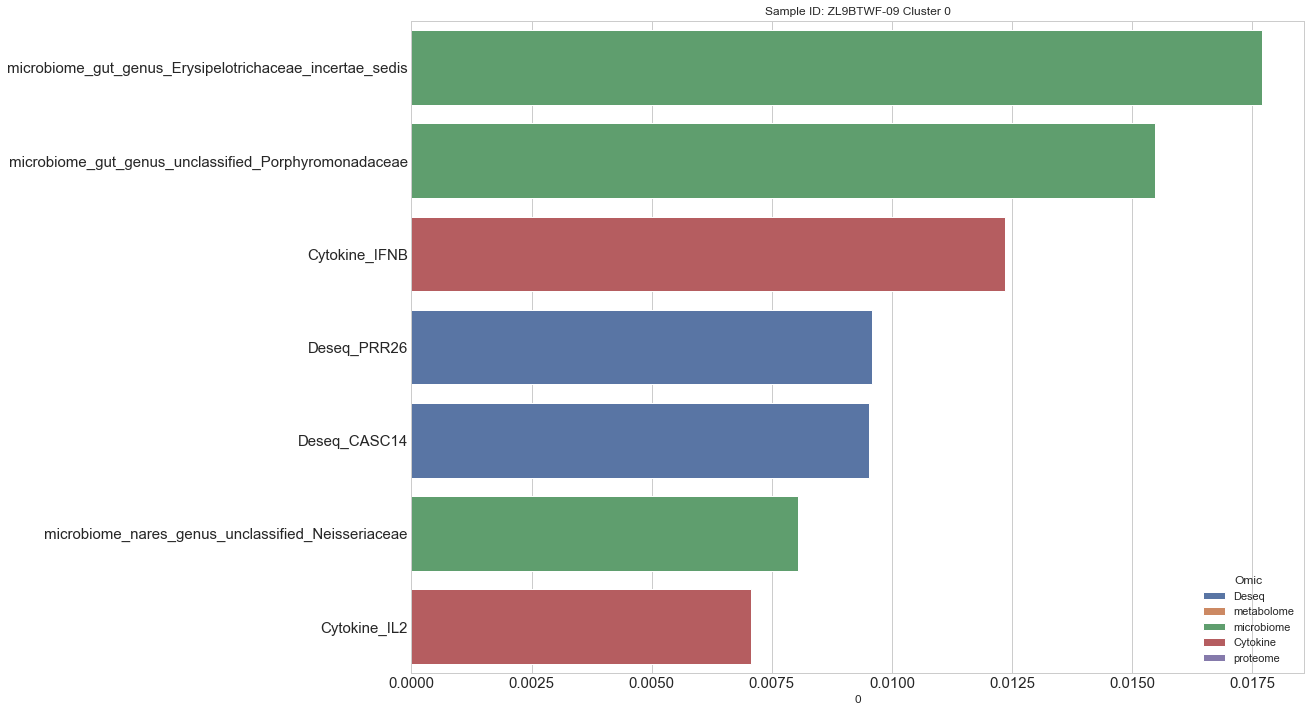

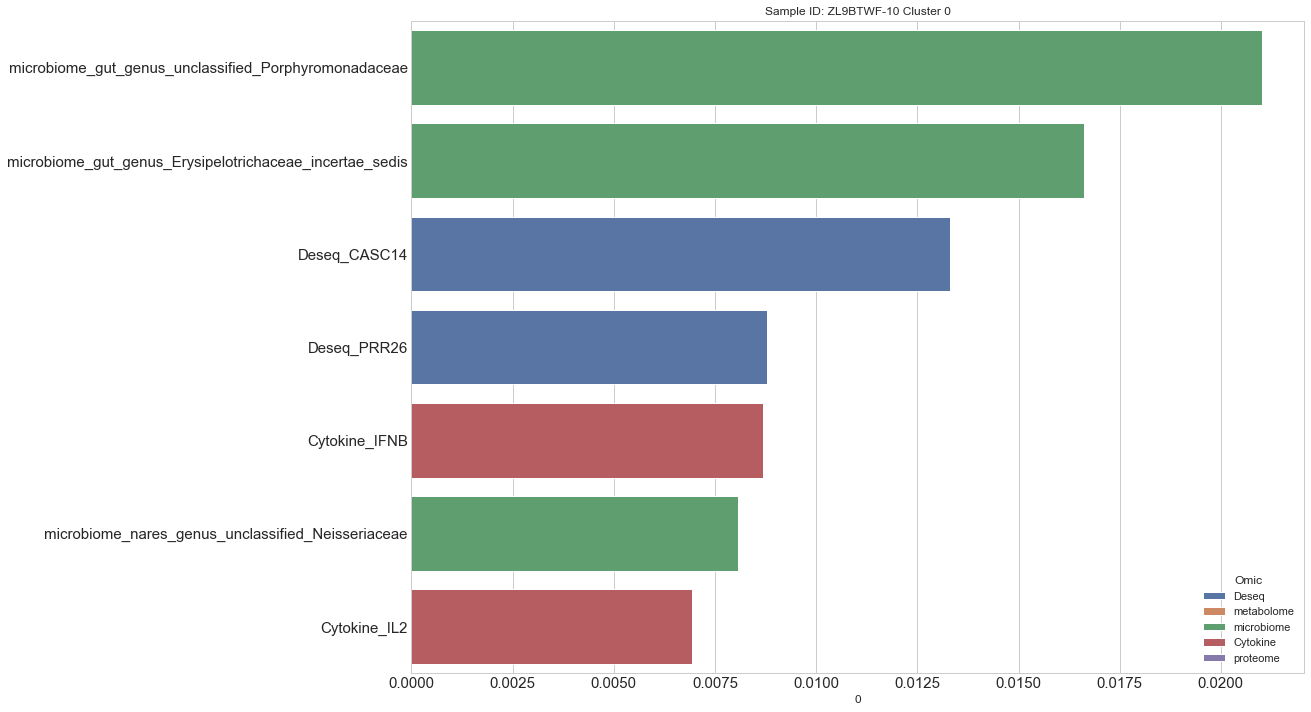

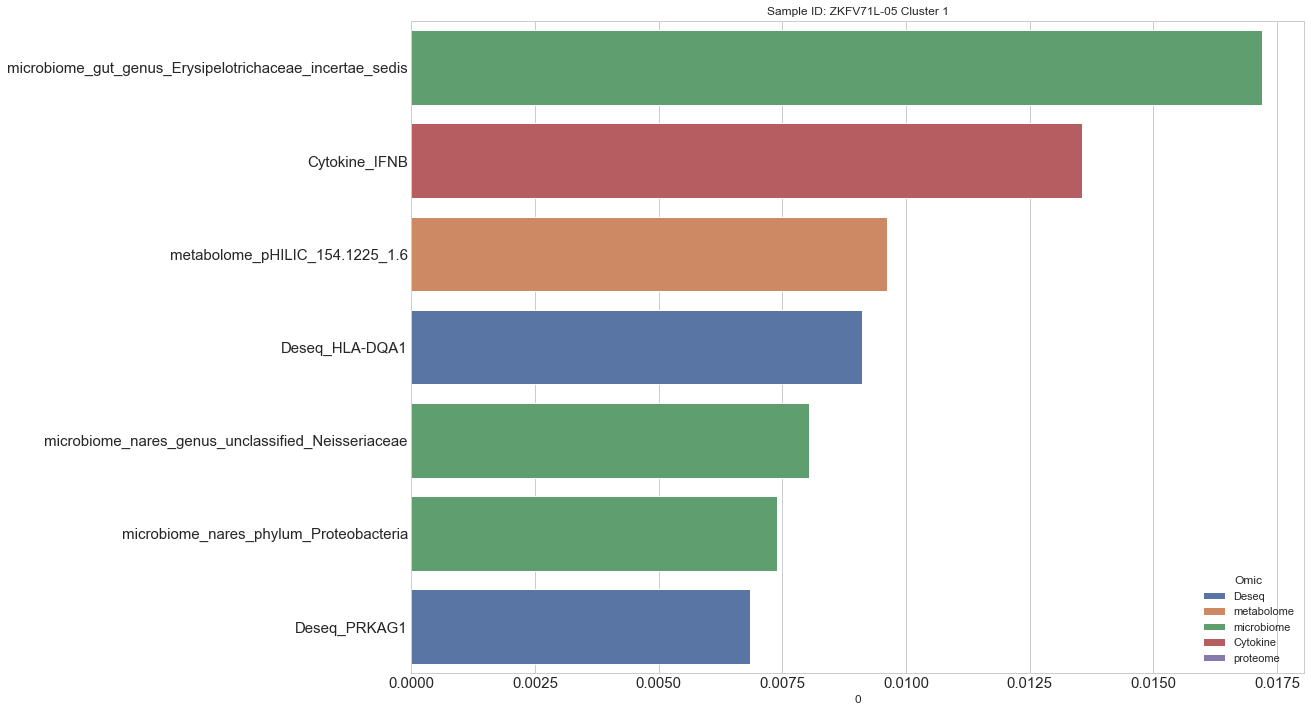

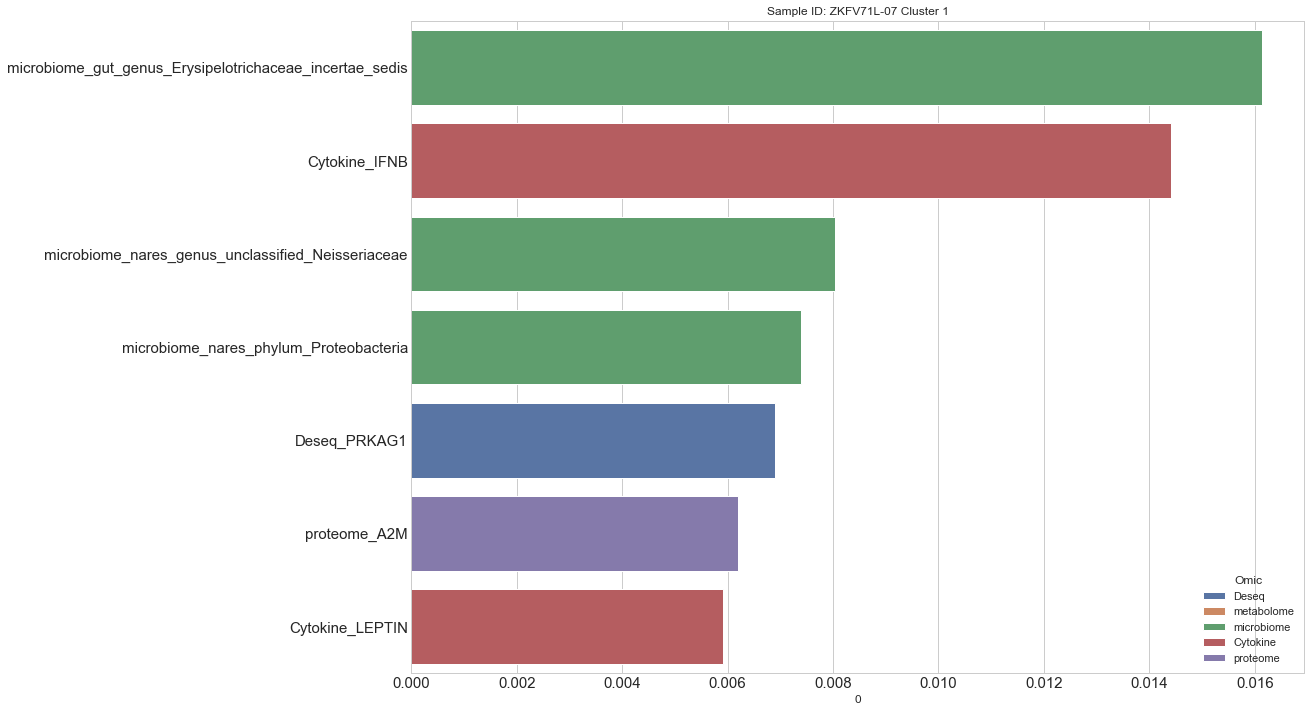

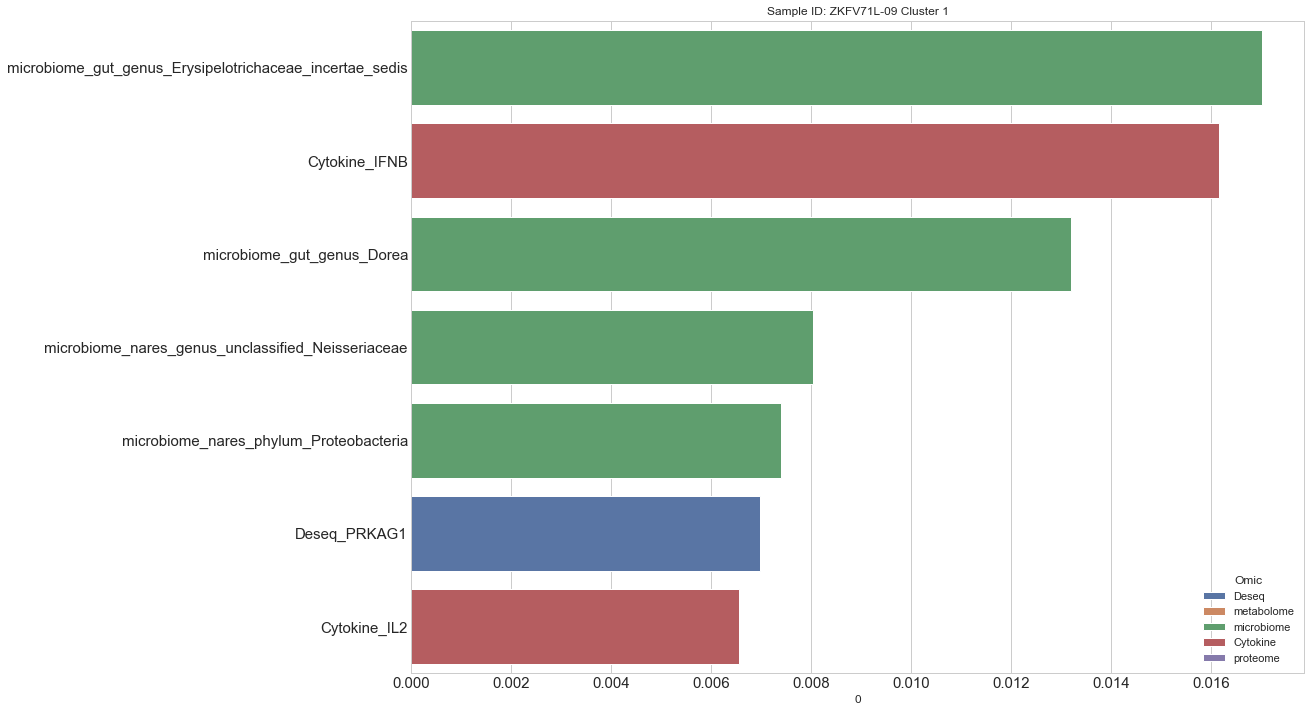

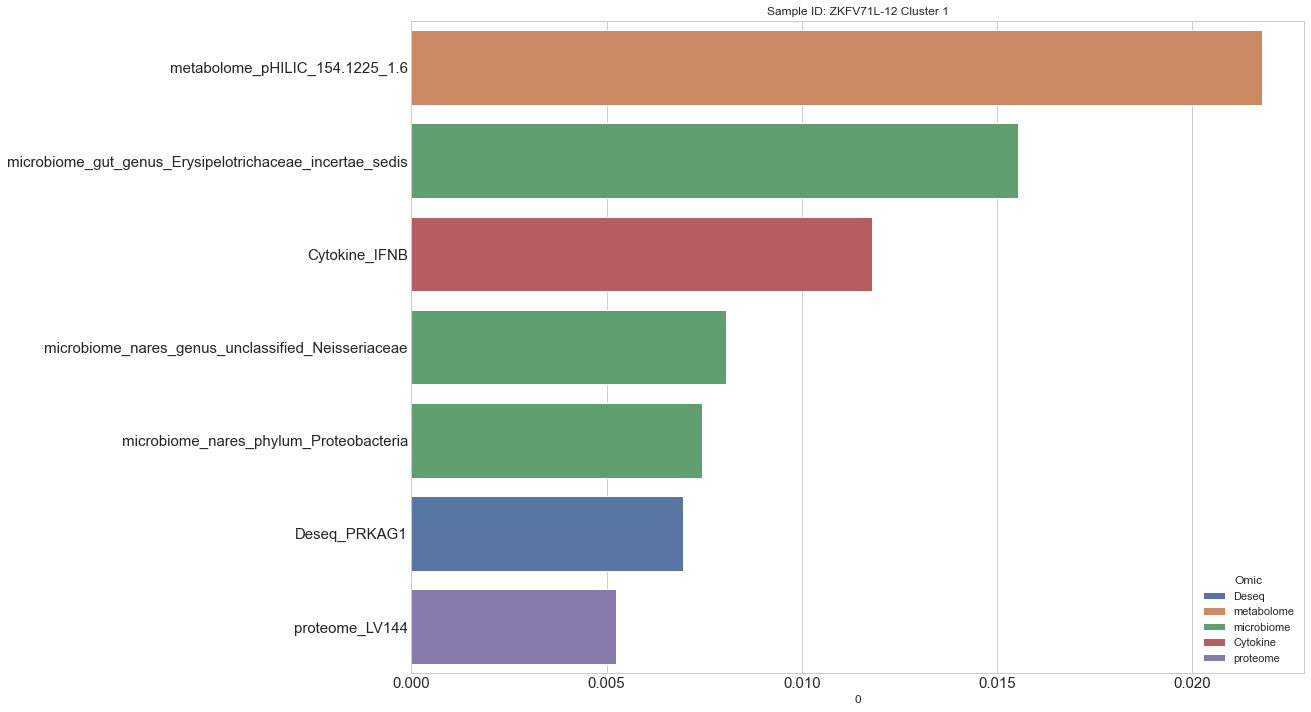

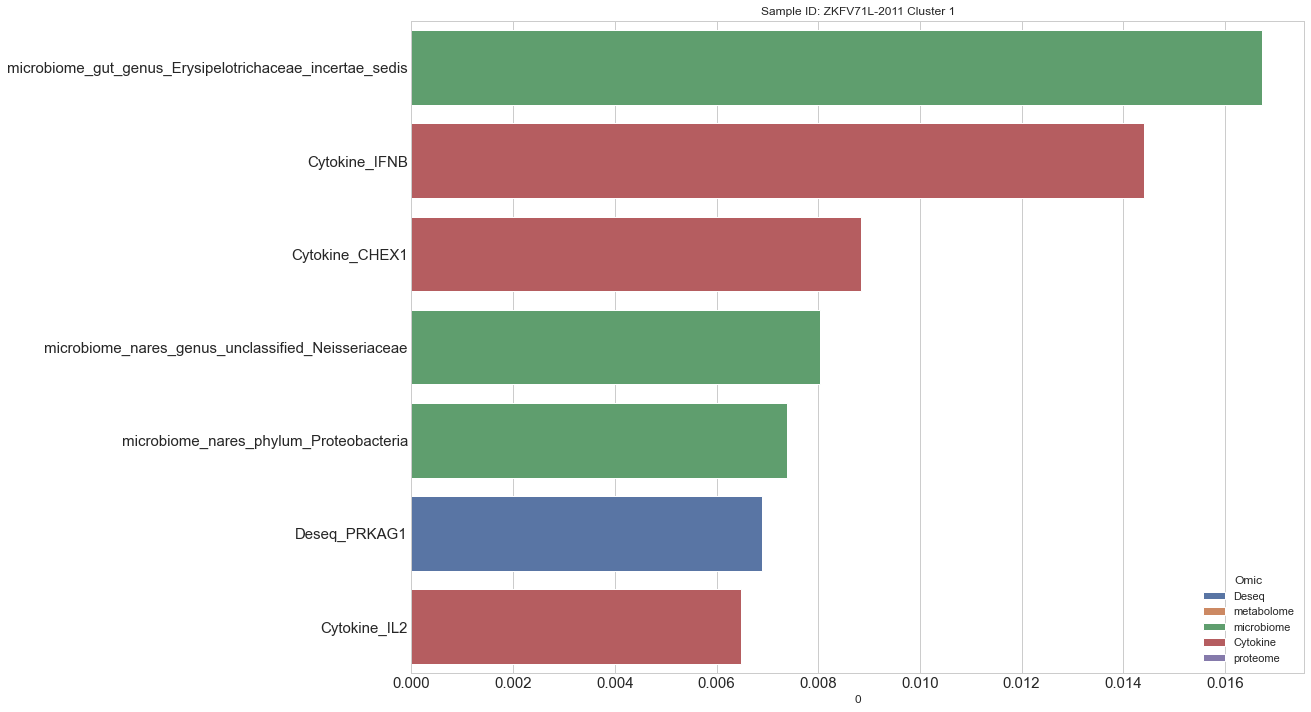

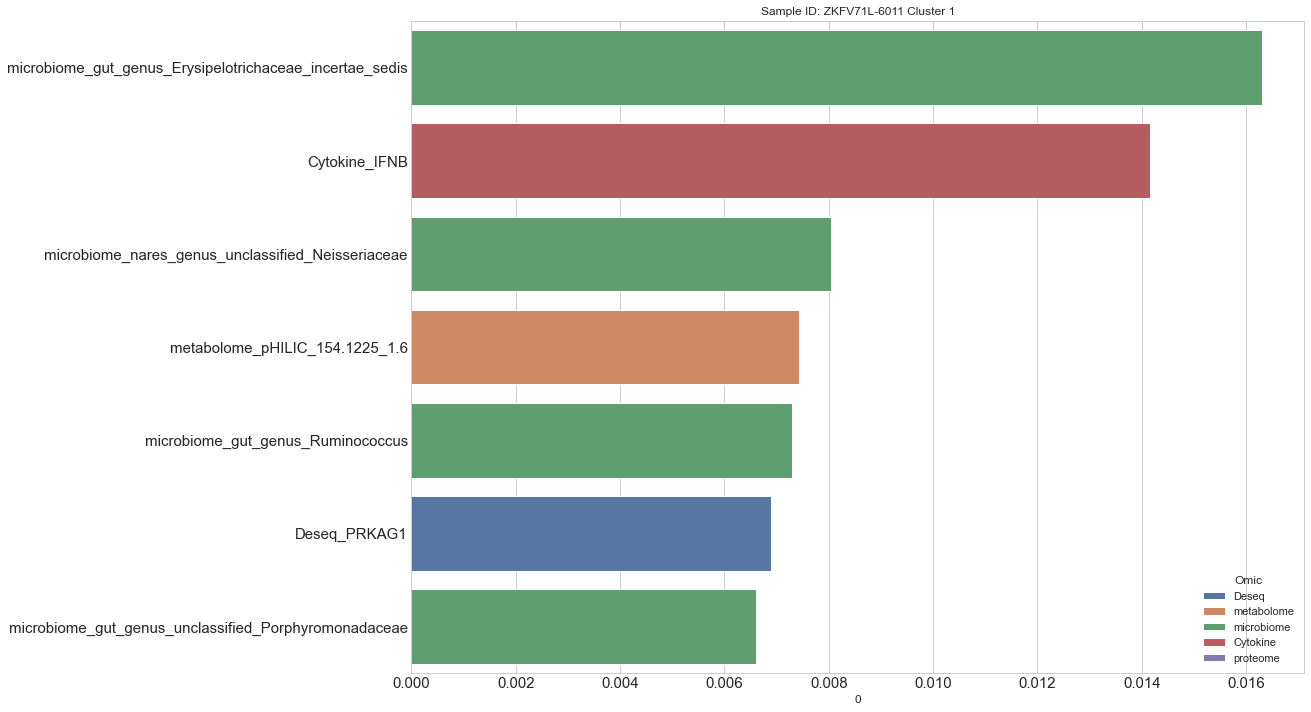

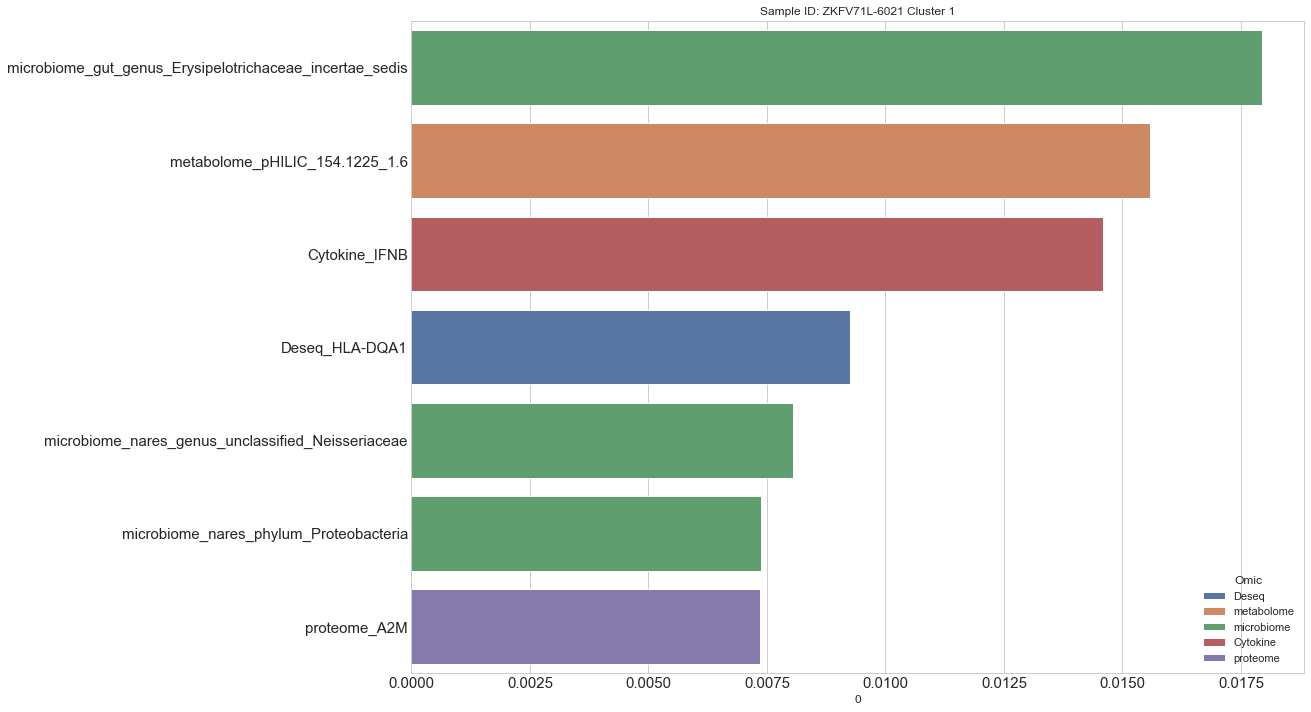

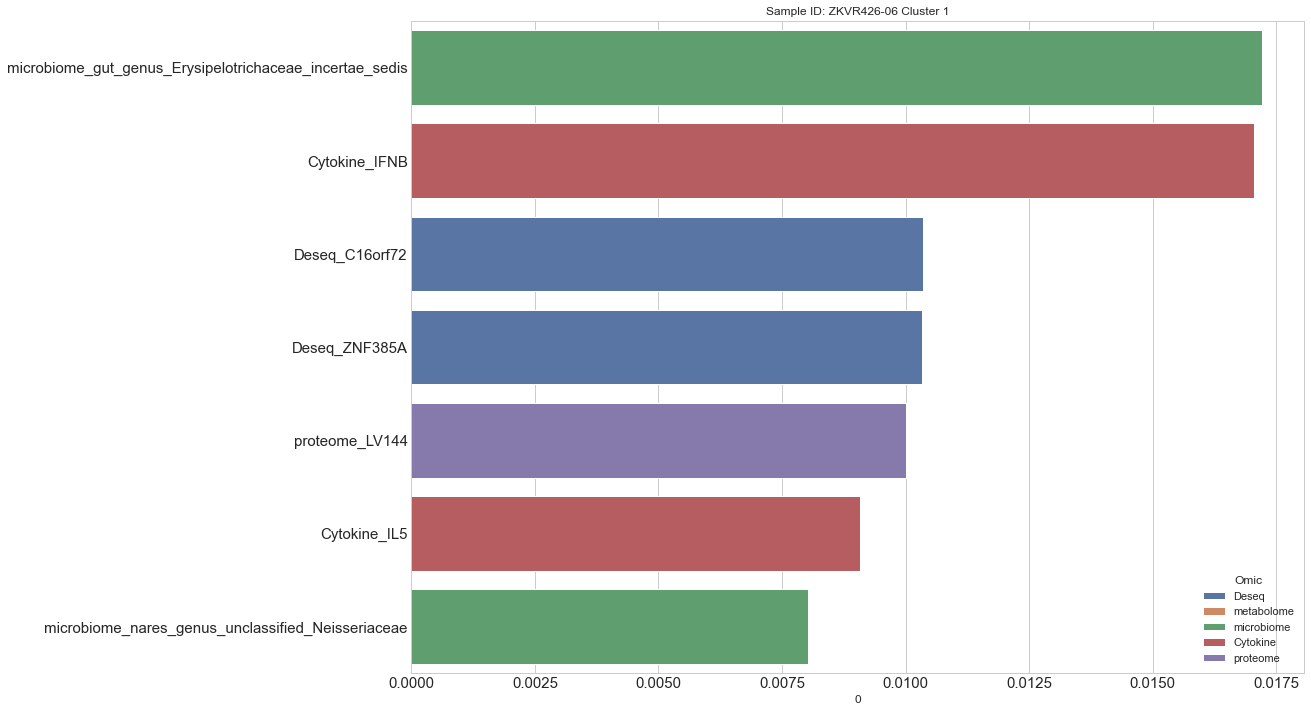

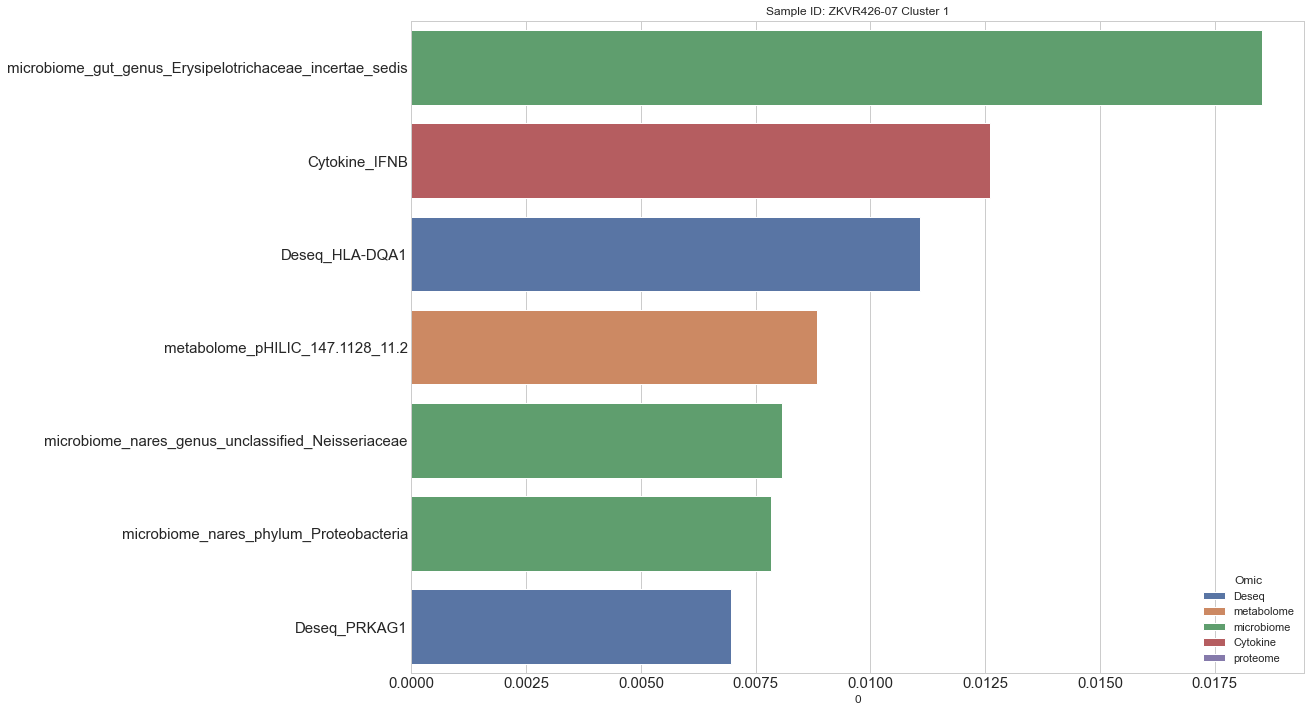

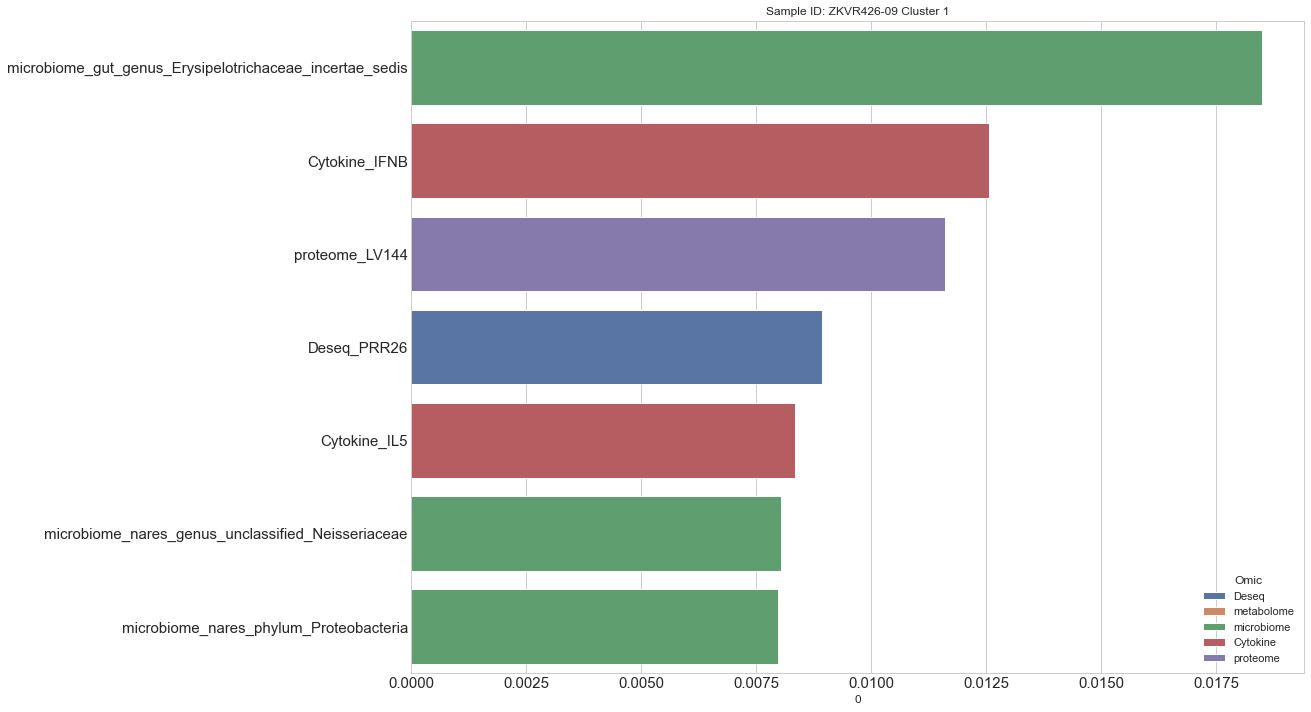

In [41]:
for k,v in clus_pt_dict.items():
    df_sh = pd.DataFrame(shap_values[0][v,:],index=X.columns).sort_values(by=0,ascending=False)[:7]
    df_sh['Omic'] = df_sh.index.str.split('_').str[0]

    fig,ax = plt.subplots()
    fig.set_size_inches(16,12)

    sns.barplot(x=df_sh[0],y=df_sh.index,orient='h',hue=df_sh['Omic'],hue_order=['Deseq', 'metabolome', 'microbiome', 'Cytokine', 'proteome'],dodge=False,ax=ax)
    plt.title("Sample ID: " + dict_df_method["gfa"]['full'].loc[v,"SampleID"] + " Cluster " + k.split("_")[0])
    plt.show()

In [32]:
clus_pt_dict["1_1"] = dict_df_method[k]['full'][dict_df_method[k]['full']['SampleID'] == "ZKFV71L-05"].index[0]
dict_df_method[k]['full'][dict_df_method[k]['full']['SampleID'] == "ZKFV71L-05"]

SampleID  Deseq_SLFN5  Deseq_CALCOCO1  Deseq_TRIM37  Deseq_TIAM1  \
135  ZKFV71L-05    -0.238533       -0.584781     -0.783861    -0.692056   

     Deseq_RPS5  Deseq_DYSF  Deseq_CDCP1  Deseq_TBC1D9  Deseq_MEFV  ...  \
135   -0.732513   -0.585067    -0.820011     -1.203257   -1.012386  ...   

     Cytokine_ENA78  Cytokine_MIP1B  Cytokine_IL2  Cytokine_IL1A  \
135         5.46528       -0.345695      -0.31737      -0.439701   

     Cytokine_IFNA  Cytokine_VEGF  Cytokine_SDF1A  Cytokine_RESISTIN  \
135       0.125466      -0.997677       -0.352806          -0.562754   

     Cytokine_IL12P70  label  
135          -0.03228   True  

[1 rows x 100 columns]

In [33]:
shap.force_plot(explainer.expected_value[1], shap_values[1][clus_pt_dict["1_1"],:],X.iloc[clus_pt_dict["1_1"],:])

In [76]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

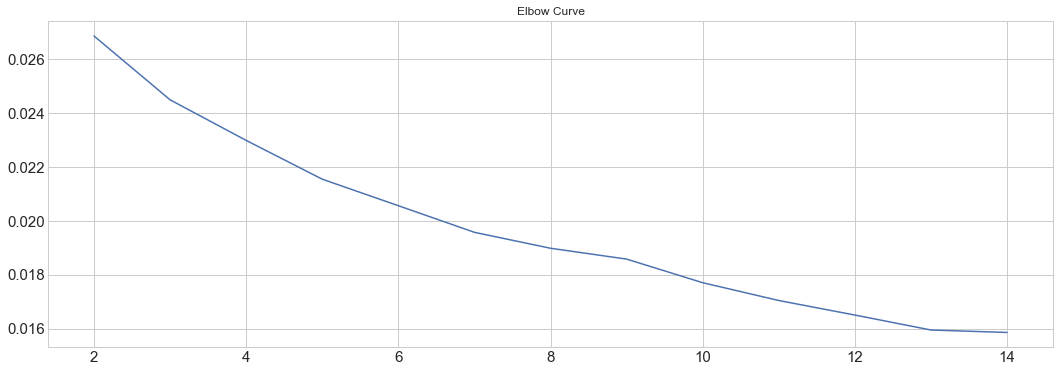

In [173]:
#convert shap_values array to dataframe
s = pd.DataFrame(shap_values[1], columns = X.columns,index=X.index)
s = s[dict_df_method['emfr']['full']['label']]
#Use Elbow method to decide the optimal number of clusters
sse = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    #fit the k-means model on the shap values
    kmeans.fit(s)
    #appent the error of each iteration
    sse.append(kmeans.inertia_)
   
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

In [178]:
kmeans = KMeans(n_clusters = 2, random_state = 100).fit(s)
#selecting cluster centres
centroids = kmeans.cluster_centers_

In [180]:
pd.DataFrame(centroids,index=[0,1],columns=X.columns).style.background_gradient(axis=1)

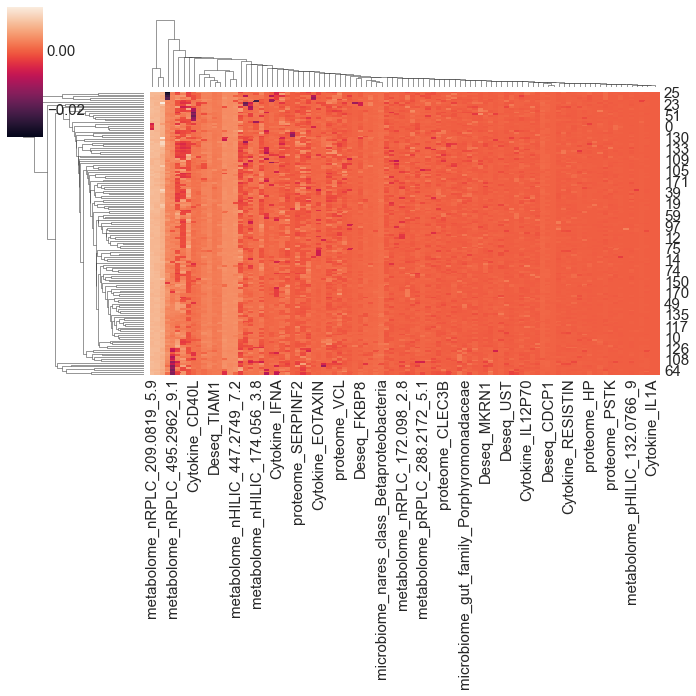

In [176]:
sns.clustermap(s)

In [181]:
kmeans.predict(s.loc[:,:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [182]:
kmeans.predict(s.loc[clus_pt_dict.values(),:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [82]:
clus_pt_dict.keys()

dict_keys(['1_1', '0_0', '0_1', '0_2', '1_0', '1_2', '2_0', '2_1', '2_2', '3_0', '3_1', '3_2'])